In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model


import random

import sys
sys.path.append("..")

import dataset,network16

# Load Data

In [2]:
# Preprocessing

scenario= "sinus" #sinus, helix
n_instance = 1000
n_features = 2
Z=4
scales = ['-1-1','0-1']
scaled = '-1-1'
nodes=8

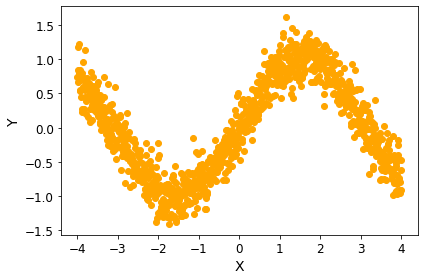

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
#storage data
os.system('mkdir Dataset')
os.system('mkdir AAE')
os.system('mkdir AAE/Models')
os.system('mkdir AAE/Losses')
os.system('mkdir AAE/Random_test')
#export_excel(X_train, 'Dataset/X_train')
#export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')
print('made dataset')

made dataset


# AAE

### Architecture

In [5]:
encoder=network16.build_encoder(Z, nodes, n_features)
#print("Encoder:\n")
#encoder.summary()


decoder=network16.build_decoder(Z,nodes, n_features)
#print("Decoder:\n")
#decoder.summary()

discriminator=network16.build_discriminator(Z)
print("Discriminator:\n")
#discriminator.summary()

Discriminator:



### Preprocessing

In [6]:
import AAE_Model16

GANorWGAN='WGAN'
epochs = 100001
BATCH_SIZE = 1000

In [7]:
aae = AAE_Model16.AAE(Z, n_features, BATCH_SIZE,GANorWGAN)

In [8]:
train_dataset, scaler, X_train_scaled = aae.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)


data shape_1 (1000, 2)
Cycles:  1
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)


## Training

In [ ]:
hist = aae.train(Z,BATCH_SIZE,train_dataset, epochs, scaler, scaled,X_train_scaled)

Epoch 1/100001
[D valid loss: 0.470859],[D fake loss: 0.000000], [G loss(mse): 0.776920, G loss(w): 0.309817]


/Users/lilyhua/OneDrive - Imperial College London/INHALE Code/Lily/AAE/AAE05019/AAE_Model16.py:200: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


INFO:tensorflow:Assets written to: AAE/Models/encoder_4_100001/assets
INFO:tensorflow:Assets written to: AAE/Models/decoder_4_100001/assets
INFO:tensorflow:Assets written to: AAE/Models/discriminator_4_100001/assets
Epoch 2/100001
[D valid loss: 0.470098],[D fake loss: 0.000000], [G loss(mse): 0.770666, G loss(w): 0.304578]
Epoch 3/100001
[D valid loss: 0.470001],[D fake loss: 0.000000], [G loss(mse): 0.772889, G loss(w): 0.308639]
Epoch 4/100001
[D valid loss: 0.467781],[D fake loss: 0.000000], [G loss(mse): 0.774443, G loss(w): 0.312615]
Epoch 5/100001
[D valid loss: 0.466472],[D fake loss: 0.000000], [G loss(mse): 0.768841, G loss(w): 0.309204]
Epoch 6/100001
[D valid loss: 0.464460],[D fake loss: 0.000000], [G loss(mse): 0.771705, G loss(w): 0.310799]
Epoch 7/100001
[D valid loss: 0.463061],[D fake loss: 0.000000], [G loss(mse): 0.766155, G loss(w): 0.308436]
Epoch 8/100001
[D valid loss: 0.462016],[D fake loss: 0.000000], [G loss(mse): 0.767170, G loss(w): 0.309553]
Epoch 9/100001

[D valid loss: 0.324190],[D fake loss: 0.000000], [G loss(mse): 0.589309, G loss(w): 0.285719]
Epoch 75/100001
[D valid loss: 0.320356],[D fake loss: 0.000000], [G loss(mse): 0.585610, G loss(w): 0.285913]
Epoch 76/100001
[D valid loss: 0.318128],[D fake loss: 0.000000], [G loss(mse): 0.575155, G loss(w): 0.279065]
Epoch 77/100001
[D valid loss: 0.315442],[D fake loss: 0.000000], [G loss(mse): 0.573565, G loss(w): 0.282231]
Epoch 78/100001
[D valid loss: 0.313709],[D fake loss: 0.000000], [G loss(mse): 0.571072, G loss(w): 0.283789]
Epoch 79/100001
[D valid loss: 0.311617],[D fake loss: 0.000000], [G loss(mse): 0.570556, G loss(w): 0.285665]
Epoch 80/100001
[D valid loss: 0.309612],[D fake loss: 0.000000], [G loss(mse): 0.561125, G loss(w): 0.280732]
Epoch 81/100001
[D valid loss: 0.304927],[D fake loss: 0.000000], [G loss(mse): 0.568523, G loss(w): 0.288339]
Epoch 82/100001
[D valid loss: 0.302437],[D fake loss: 0.000000], [G loss(mse): 0.558064, G loss(w): 0.282421]
Epoch 83/100001
[

[D valid loss: 0.150733],[D fake loss: 0.000000], [G loss(mse): 0.381822, G loss(w): 0.279422]
Epoch 149/100001
[D valid loss: 0.148153],[D fake loss: 0.000000], [G loss(mse): 0.378079, G loss(w): 0.276101]
Epoch 150/100001
[D valid loss: 0.148167],[D fake loss: 0.000000], [G loss(mse): 0.375022, G loss(w): 0.273866]
Epoch 151/100001
[D valid loss: 0.145956],[D fake loss: 0.000000], [G loss(mse): 0.378959, G loss(w): 0.279728]
Epoch 152/100001
[D valid loss: 0.145255],[D fake loss: 0.000000], [G loss(mse): 0.374329, G loss(w): 0.279453]
Epoch 153/100001
[D valid loss: 0.144073],[D fake loss: 0.000000], [G loss(mse): 0.366955, G loss(w): 0.276874]
Epoch 154/100001
[D valid loss: 0.142037],[D fake loss: 0.000000], [G loss(mse): 0.365628, G loss(w): 0.271933]
Epoch 155/100001
[D valid loss: 0.138050],[D fake loss: 0.000000], [G loss(mse): 0.367620, G loss(w): 0.276323]
Epoch 156/100001
[D valid loss: 0.137804],[D fake loss: 0.000000], [G loss(mse): 0.361695, G loss(w): 0.272959]
Epoch 157

[D valid loss: 0.064768],[D fake loss: 0.000000], [G loss(mse): 0.290577, G loss(w): 0.262947]
Epoch 223/100001
[D valid loss: 0.064439],[D fake loss: 0.000000], [G loss(mse): 0.296571, G loss(w): 0.267848]
Epoch 224/100001
[D valid loss: 0.063760],[D fake loss: 0.000000], [G loss(mse): 0.296118, G loss(w): 0.269685]
Epoch 225/100001
[D valid loss: 0.063406],[D fake loss: 0.000000], [G loss(mse): 0.294384, G loss(w): 0.265590]
Epoch 226/100001
[D valid loss: 0.062909],[D fake loss: 0.000000], [G loss(mse): 0.297935, G loss(w): 0.268901]
Epoch 227/100001
[D valid loss: 0.060522],[D fake loss: 0.000000], [G loss(mse): 0.291706, G loss(w): 0.265547]
Epoch 228/100001
[D valid loss: 0.060316],[D fake loss: 0.000000], [G loss(mse): 0.293457, G loss(w): 0.266921]
Epoch 229/100001
[D valid loss: 0.059685],[D fake loss: 0.000000], [G loss(mse): 0.289658, G loss(w): 0.265116]
Epoch 230/100001
[D valid loss: 0.059179],[D fake loss: 0.000000], [G loss(mse): 0.290592, G loss(w): 0.262399]
Epoch 231

[D valid loss: 0.029340],[D fake loss: 0.000000], [G loss(mse): 0.261614, G loss(w): 0.250922]
Epoch 297/100001
[D valid loss: 0.029999],[D fake loss: 0.000000], [G loss(mse): 0.258535, G loss(w): 0.248470]
Epoch 298/100001
[D valid loss: 0.028754],[D fake loss: 0.000000], [G loss(mse): 0.262748, G loss(w): 0.251525]
Epoch 299/100001
[D valid loss: 0.028642],[D fake loss: 0.000000], [G loss(mse): 0.260380, G loss(w): 0.249467]
Epoch 300/100001
[D valid loss: 0.028064],[D fake loss: 0.000000], [G loss(mse): 0.255929, G loss(w): 0.246138]
Epoch 301/100001
[D valid loss: 0.028202],[D fake loss: 0.000000], [G loss(mse): 0.260609, G loss(w): 0.250361]
Epoch 302/100001
[D valid loss: 0.027179],[D fake loss: 0.000000], [G loss(mse): 0.254748, G loss(w): 0.244423]
Epoch 303/100001
[D valid loss: 0.027109],[D fake loss: 0.000000], [G loss(mse): 0.257774, G loss(w): 0.248218]
Epoch 304/100001
[D valid loss: 0.027151],[D fake loss: 0.000000], [G loss(mse): 0.262306, G loss(w): 0.251881]
Epoch 305

[D valid loss: 0.014237],[D fake loss: 0.000000], [G loss(mse): 0.223684, G loss(w): 0.219130]
Epoch 371/100001
[D valid loss: 0.014290],[D fake loss: 0.000000], [G loss(mse): 0.223865, G loss(w): 0.218787]
Epoch 372/100001
[D valid loss: 0.013876],[D fake loss: 0.000000], [G loss(mse): 0.225032, G loss(w): 0.220573]
Epoch 373/100001
[D valid loss: 0.013591],[D fake loss: 0.000000], [G loss(mse): 0.228093, G loss(w): 0.224101]
Epoch 374/100001
[D valid loss: 0.013506],[D fake loss: 0.000000], [G loss(mse): 0.228887, G loss(w): 0.224312]
Epoch 375/100001
[D valid loss: 0.013619],[D fake loss: 0.000000], [G loss(mse): 0.233295, G loss(w): 0.229185]
Epoch 376/100001
[D valid loss: 0.013426],[D fake loss: 0.000000], [G loss(mse): 0.218415, G loss(w): 0.214081]
Epoch 377/100001
[D valid loss: 0.013304],[D fake loss: 0.000000], [G loss(mse): 0.224793, G loss(w): 0.220645]
Epoch 378/100001
[D valid loss: 0.013510],[D fake loss: 0.000000], [G loss(mse): 0.219379, G loss(w): 0.214752]
Epoch 379

[D valid loss: 0.007108],[D fake loss: 0.000000], [G loss(mse): 0.201098, G loss(w): 0.198918]
Epoch 445/100001
[D valid loss: 0.007110],[D fake loss: 0.000000], [G loss(mse): 0.196043, G loss(w): 0.193872]
Epoch 446/100001
[D valid loss: 0.007031],[D fake loss: 0.000000], [G loss(mse): 0.190686, G loss(w): 0.188549]
Epoch 447/100001
[D valid loss: 0.007117],[D fake loss: 0.000000], [G loss(mse): 0.199281, G loss(w): 0.196939]
Epoch 448/100001
[D valid loss: 0.006724],[D fake loss: 0.000000], [G loss(mse): 0.191393, G loss(w): 0.189363]
Epoch 449/100001
[D valid loss: 0.006923],[D fake loss: 0.000000], [G loss(mse): 0.193308, G loss(w): 0.191314]
Epoch 450/100001
[D valid loss: 0.006779],[D fake loss: 0.000000], [G loss(mse): 0.189915, G loss(w): 0.187707]
Epoch 451/100001
[D valid loss: 0.006720],[D fake loss: 0.000000], [G loss(mse): 0.193283, G loss(w): 0.191253]
Epoch 452/100001
[D valid loss: 0.006777],[D fake loss: 0.000000], [G loss(mse): 0.184979, G loss(w): 0.183064]
Epoch 453

[D valid loss: 0.003662],[D fake loss: 0.000000], [G loss(mse): 0.168571, G loss(w): 0.167556]
Epoch 519/100001
[D valid loss: 0.003644],[D fake loss: 0.000000], [G loss(mse): 0.162874, G loss(w): 0.161828]
Epoch 520/100001
[D valid loss: 0.003688],[D fake loss: 0.000000], [G loss(mse): 0.161752, G loss(w): 0.160605]
Epoch 521/100001
[D valid loss: 0.003715],[D fake loss: 0.000000], [G loss(mse): 0.161179, G loss(w): 0.160047]
Epoch 522/100001
[D valid loss: 0.003599],[D fake loss: 0.000000], [G loss(mse): 0.165398, G loss(w): 0.164449]
Epoch 523/100001
[D valid loss: 0.003566],[D fake loss: 0.000000], [G loss(mse): 0.162479, G loss(w): 0.161398]
Epoch 524/100001
[D valid loss: 0.003521],[D fake loss: 0.000000], [G loss(mse): 0.164027, G loss(w): 0.163027]
Epoch 525/100001
[D valid loss: 0.003437],[D fake loss: 0.000000], [G loss(mse): 0.160985, G loss(w): 0.159963]
Epoch 526/100001
[D valid loss: 0.003449],[D fake loss: 0.000000], [G loss(mse): 0.157786, G loss(w): 0.156926]
Epoch 527

[D valid loss: 0.002040],[D fake loss: 0.000000], [G loss(mse): 0.141164, G loss(w): 0.140619]
Epoch 593/100001
[D valid loss: 0.001976],[D fake loss: 0.000000], [G loss(mse): 0.133891, G loss(w): 0.133293]
Epoch 594/100001
[D valid loss: 0.001954],[D fake loss: 0.000000], [G loss(mse): 0.134685, G loss(w): 0.134119]
Epoch 595/100001
[D valid loss: 0.002028],[D fake loss: 0.000000], [G loss(mse): 0.136369, G loss(w): 0.135801]
Epoch 596/100001
[D valid loss: 0.001905],[D fake loss: 0.000000], [G loss(mse): 0.137923, G loss(w): 0.137307]
Epoch 597/100001
[D valid loss: 0.001975],[D fake loss: 0.000000], [G loss(mse): 0.136505, G loss(w): 0.136025]
Epoch 598/100001
[D valid loss: 0.001864],[D fake loss: 0.000000], [G loss(mse): 0.136033, G loss(w): 0.135555]
Epoch 599/100001
[D valid loss: 0.001895],[D fake loss: 0.000000], [G loss(mse): 0.136975, G loss(w): 0.136380]
Epoch 600/100001
[D valid loss: 0.001807],[D fake loss: 0.000000], [G loss(mse): 0.135489, G loss(w): 0.134925]
Epoch 601

[D valid loss: 0.001110],[D fake loss: 0.000000], [G loss(mse): 0.117837, G loss(w): 0.117539]
Epoch 667/100001
[D valid loss: 0.001081],[D fake loss: 0.000000], [G loss(mse): 0.119514, G loss(w): 0.119251]
Epoch 668/100001
[D valid loss: 0.001109],[D fake loss: 0.000000], [G loss(mse): 0.117458, G loss(w): 0.117157]
Epoch 669/100001
[D valid loss: 0.001110],[D fake loss: 0.000000], [G loss(mse): 0.121274, G loss(w): 0.120916]
Epoch 670/100001
[D valid loss: 0.001059],[D fake loss: 0.000000], [G loss(mse): 0.116972, G loss(w): 0.116711]
Epoch 671/100001
[D valid loss: 0.001064],[D fake loss: 0.000000], [G loss(mse): 0.119536, G loss(w): 0.119231]
Epoch 672/100001
[D valid loss: 0.001024],[D fake loss: 0.000000], [G loss(mse): 0.118044, G loss(w): 0.117789]
Epoch 673/100001
[D valid loss: 0.001070],[D fake loss: 0.000000], [G loss(mse): 0.121114, G loss(w): 0.120919]
Epoch 674/100001
[D valid loss: 0.001005],[D fake loss: 0.000000], [G loss(mse): 0.121162, G loss(w): 0.120826]
Epoch 675

[D valid loss: 0.000604],[D fake loss: 0.000000], [G loss(mse): 0.106457, G loss(w): 0.106292]
Epoch 741/100001
[D valid loss: 0.000605],[D fake loss: 0.000000], [G loss(mse): 0.103899, G loss(w): 0.103738]
Epoch 742/100001
[D valid loss: 0.000624],[D fake loss: 0.000000], [G loss(mse): 0.102644, G loss(w): 0.102470]
Epoch 743/100001
[D valid loss: 0.000613],[D fake loss: 0.000000], [G loss(mse): 0.107232, G loss(w): 0.107063]
Epoch 744/100001
[D valid loss: 0.000575],[D fake loss: 0.000000], [G loss(mse): 0.107654, G loss(w): 0.107505]
Epoch 745/100001
[D valid loss: 0.000591],[D fake loss: 0.000000], [G loss(mse): 0.109848, G loss(w): 0.109659]
Epoch 746/100001
[D valid loss: 0.000589],[D fake loss: 0.000000], [G loss(mse): 0.110017, G loss(w): 0.109840]
Epoch 747/100001
[D valid loss: 0.000594],[D fake loss: 0.000000], [G loss(mse): 0.109860, G loss(w): 0.109705]
Epoch 748/100001
[D valid loss: 0.000577],[D fake loss: 0.000000], [G loss(mse): 0.105364, G loss(w): 0.105220]
Epoch 749

[D valid loss: 0.000346],[D fake loss: 0.000000], [G loss(mse): 0.100828, G loss(w): 0.100744]
Epoch 815/100001
[D valid loss: 0.000344],[D fake loss: 0.000000], [G loss(mse): 0.095389, G loss(w): 0.095275]
Epoch 816/100001
[D valid loss: 0.000357],[D fake loss: 0.000000], [G loss(mse): 0.097831, G loss(w): 0.097740]
Epoch 817/100001
[D valid loss: 0.000340],[D fake loss: 0.000000], [G loss(mse): 0.097141, G loss(w): 0.097056]
Epoch 818/100001
[D valid loss: 0.000346],[D fake loss: 0.000000], [G loss(mse): 0.095712, G loss(w): 0.095636]
Epoch 819/100001
[D valid loss: 0.000348],[D fake loss: 0.000000], [G loss(mse): 0.099745, G loss(w): 0.099663]
Epoch 820/100001
[D valid loss: 0.000334],[D fake loss: 0.000000], [G loss(mse): 0.098539, G loss(w): 0.098448]
Epoch 821/100001
[D valid loss: 0.000335],[D fake loss: 0.000000], [G loss(mse): 0.090942, G loss(w): 0.090857]
Epoch 822/100001
[D valid loss: 0.000343],[D fake loss: 0.000000], [G loss(mse): 0.092999, G loss(w): 0.092898]
Epoch 823

[D valid loss: 0.000200],[D fake loss: 0.000000], [G loss(mse): 0.087823, G loss(w): 0.087774]
Epoch 889/100001
[D valid loss: 0.000198],[D fake loss: 0.000000], [G loss(mse): 0.088302, G loss(w): 0.088251]
Epoch 890/100001
[D valid loss: 0.000198],[D fake loss: 0.000000], [G loss(mse): 0.087381, G loss(w): 0.087331]
Epoch 891/100001
[D valid loss: 0.000200],[D fake loss: 0.000000], [G loss(mse): 0.085337, G loss(w): 0.085290]
Epoch 892/100001
[D valid loss: 0.000197],[D fake loss: 0.000000], [G loss(mse): 0.088922, G loss(w): 0.088878]
Epoch 893/100001
[D valid loss: 0.000206],[D fake loss: 0.000000], [G loss(mse): 0.087164, G loss(w): 0.087117]
Epoch 894/100001
[D valid loss: 0.000192],[D fake loss: 0.000000], [G loss(mse): 0.079760, G loss(w): 0.079721]
Epoch 895/100001
[D valid loss: 0.000199],[D fake loss: 0.000000], [G loss(mse): 0.086790, G loss(w): 0.086745]
Epoch 896/100001
[D valid loss: 0.000194],[D fake loss: 0.000000], [G loss(mse): 0.090607, G loss(w): 0.090549]
Epoch 897

[D valid loss: 0.000120],[D fake loss: 0.000000], [G loss(mse): 0.079810, G loss(w): 0.079786]
Epoch 963/100001
[D valid loss: 0.000122],[D fake loss: 0.000000], [G loss(mse): 0.078802, G loss(w): 0.078778]
Epoch 964/100001
[D valid loss: 0.000116],[D fake loss: 0.000000], [G loss(mse): 0.079715, G loss(w): 0.079691]
Epoch 965/100001
[D valid loss: 0.000119],[D fake loss: 0.000000], [G loss(mse): 0.078321, G loss(w): 0.078286]
Epoch 966/100001
[D valid loss: 0.000116],[D fake loss: 0.000000], [G loss(mse): 0.077742, G loss(w): 0.077717]
Epoch 967/100001
[D valid loss: 0.000109],[D fake loss: 0.000000], [G loss(mse): 0.078811, G loss(w): 0.078786]
Epoch 968/100001
[D valid loss: 0.000114],[D fake loss: 0.000000], [G loss(mse): 0.080743, G loss(w): 0.080718]
Epoch 969/100001
[D valid loss: 0.000116],[D fake loss: 0.000000], [G loss(mse): 0.079428, G loss(w): 0.079398]
Epoch 970/100001
[D valid loss: 0.000115],[D fake loss: 0.000000], [G loss(mse): 0.076746, G loss(w): 0.076718]
Epoch 971

[D valid loss: 0.000069],[D fake loss: 0.000000], [G loss(mse): 0.069202, G loss(w): 0.069185]
Epoch 1036/100001
[D valid loss: 0.000070],[D fake loss: 0.000000], [G loss(mse): 0.069302, G loss(w): 0.069288]
Epoch 1037/100001
[D valid loss: 0.000067],[D fake loss: 0.000000], [G loss(mse): 0.070892, G loss(w): 0.070874]
Epoch 1038/100001
[D valid loss: 0.000068],[D fake loss: 0.000000], [G loss(mse): 0.067852, G loss(w): 0.067837]
Epoch 1039/100001
[D valid loss: 0.000066],[D fake loss: 0.000000], [G loss(mse): 0.071050, G loss(w): 0.071035]
Epoch 1040/100001
[D valid loss: 0.000070],[D fake loss: 0.000000], [G loss(mse): 0.068695, G loss(w): 0.068678]
Epoch 1041/100001
[D valid loss: 0.000068],[D fake loss: 0.000000], [G loss(mse): 0.074455, G loss(w): 0.074444]
Epoch 1042/100001
[D valid loss: 0.000069],[D fake loss: 0.000000], [G loss(mse): 0.071746, G loss(w): 0.071730]
Epoch 1043/100001
[D valid loss: 0.000068],[D fake loss: 0.000000], [G loss(mse): 0.068819, G loss(w): 0.068805]
E

[D valid loss: 0.000041],[D fake loss: 0.000000], [G loss(mse): 0.062654, G loss(w): 0.062646]
Epoch 1109/100001
[D valid loss: 0.000045],[D fake loss: 0.000000], [G loss(mse): 0.064214, G loss(w): 0.064207]
Epoch 1110/100001
[D valid loss: 0.000042],[D fake loss: 0.000000], [G loss(mse): 0.063314, G loss(w): 0.063305]
Epoch 1111/100001
[D valid loss: 0.000041],[D fake loss: 0.000000], [G loss(mse): 0.064177, G loss(w): 0.064169]
Epoch 1112/100001
[D valid loss: 0.000041],[D fake loss: 0.000000], [G loss(mse): 0.062982, G loss(w): 0.062975]
Epoch 1113/100001
[D valid loss: 0.000041],[D fake loss: 0.000000], [G loss(mse): 0.062834, G loss(w): 0.062825]
Epoch 1114/100001
[D valid loss: 0.000040],[D fake loss: 0.000000], [G loss(mse): 0.063509, G loss(w): 0.063501]
Epoch 1115/100001
[D valid loss: 0.000039],[D fake loss: 0.000000], [G loss(mse): 0.065431, G loss(w): 0.065425]
Epoch 1116/100001
[D valid loss: 0.000039],[D fake loss: 0.000000], [G loss(mse): 0.059513, G loss(w): 0.059506]
E

[D valid loss: 0.000025],[D fake loss: 0.000000], [G loss(mse): 0.059720, G loss(w): 0.059715]
Epoch 1182/100001
[D valid loss: 0.000026],[D fake loss: 0.000000], [G loss(mse): 0.054527, G loss(w): 0.054523]
Epoch 1183/100001
[D valid loss: 0.000024],[D fake loss: 0.000000], [G loss(mse): 0.054529, G loss(w): 0.054524]
Epoch 1184/100001
[D valid loss: 0.000025],[D fake loss: 0.000000], [G loss(mse): 0.056159, G loss(w): 0.056155]
Epoch 1185/100001
[D valid loss: 0.000026],[D fake loss: 0.000000], [G loss(mse): 0.056179, G loss(w): 0.056173]
Epoch 1186/100001
[D valid loss: 0.000024],[D fake loss: 0.000000], [G loss(mse): 0.053144, G loss(w): 0.053139]
Epoch 1187/100001
[D valid loss: 0.000023],[D fake loss: 0.000000], [G loss(mse): 0.055600, G loss(w): 0.055596]
Epoch 1188/100001
[D valid loss: 0.000024],[D fake loss: 0.000000], [G loss(mse): 0.054183, G loss(w): 0.054178]
Epoch 1189/100001
[D valid loss: 0.000023],[D fake loss: 0.000000], [G loss(mse): 0.054664, G loss(w): 0.054661]
E

[D valid loss: 0.000015],[D fake loss: 0.000000], [G loss(mse): 0.050914, G loss(w): 0.050911]
Epoch 1255/100001
[D valid loss: 0.000015],[D fake loss: 0.000000], [G loss(mse): 0.051601, G loss(w): 0.051599]
Epoch 1256/100001
[D valid loss: 0.000015],[D fake loss: 0.000000], [G loss(mse): 0.049177, G loss(w): 0.049175]
Epoch 1257/100001
[D valid loss: 0.000015],[D fake loss: 0.000000], [G loss(mse): 0.049549, G loss(w): 0.049547]
Epoch 1258/100001
[D valid loss: 0.000015],[D fake loss: 0.000000], [G loss(mse): 0.048215, G loss(w): 0.048213]
Epoch 1259/100001
[D valid loss: 0.000015],[D fake loss: 0.000000], [G loss(mse): 0.049206, G loss(w): 0.049204]
Epoch 1260/100001
[D valid loss: 0.000014],[D fake loss: 0.000000], [G loss(mse): 0.050601, G loss(w): 0.050598]
Epoch 1261/100001
[D valid loss: 0.000014],[D fake loss: 0.000000], [G loss(mse): 0.048963, G loss(w): 0.048960]
Epoch 1262/100001
[D valid loss: 0.000015],[D fake loss: 0.000000], [G loss(mse): 0.052223, G loss(w): 0.052220]
E

[D valid loss: 0.000009],[D fake loss: 0.000000], [G loss(mse): 0.043979, G loss(w): 0.043978]
Epoch 1328/100001
[D valid loss: 0.000009],[D fake loss: 0.000000], [G loss(mse): 0.043663, G loss(w): 0.043662]
Epoch 1329/100001
[D valid loss: 0.000009],[D fake loss: 0.000000], [G loss(mse): 0.044505, G loss(w): 0.044504]
Epoch 1330/100001
[D valid loss: 0.000008],[D fake loss: 0.000000], [G loss(mse): 0.043729, G loss(w): 0.043728]
Epoch 1331/100001
[D valid loss: 0.000009],[D fake loss: 0.000000], [G loss(mse): 0.042621, G loss(w): 0.042620]
Epoch 1332/100001
[D valid loss: 0.000009],[D fake loss: 0.000000], [G loss(mse): 0.042584, G loss(w): 0.042583]
Epoch 1333/100001
[D valid loss: 0.000009],[D fake loss: 0.000000], [G loss(mse): 0.045014, G loss(w): 0.045013]
Epoch 1334/100001
[D valid loss: 0.000009],[D fake loss: 0.000000], [G loss(mse): 0.043098, G loss(w): 0.043097]
Epoch 1335/100001
[D valid loss: 0.000009],[D fake loss: 0.000000], [G loss(mse): 0.044349, G loss(w): 0.044347]
E

[D valid loss: 0.000006],[D fake loss: 0.000000], [G loss(mse): 0.041815, G loss(w): 0.041814]
Epoch 1401/100001
[D valid loss: 0.000005],[D fake loss: 0.000000], [G loss(mse): 0.041789, G loss(w): 0.041789]
Epoch 1402/100001
[D valid loss: 0.000005],[D fake loss: 0.000000], [G loss(mse): 0.039051, G loss(w): 0.039050]
Epoch 1403/100001
[D valid loss: 0.000005],[D fake loss: 0.000000], [G loss(mse): 0.039256, G loss(w): 0.039256]
Epoch 1404/100001
[D valid loss: 0.000005],[D fake loss: 0.000000], [G loss(mse): 0.040282, G loss(w): 0.040281]
Epoch 1405/100001
[D valid loss: 0.000005],[D fake loss: 0.000000], [G loss(mse): 0.035749, G loss(w): 0.035748]
Epoch 1406/100001
[D valid loss: 0.000005],[D fake loss: 0.000000], [G loss(mse): 0.040072, G loss(w): 0.040072]
Epoch 1407/100001
[D valid loss: 0.000005],[D fake loss: 0.000000], [G loss(mse): 0.040293, G loss(w): 0.040293]
Epoch 1408/100001
[D valid loss: 0.000005],[D fake loss: 0.000000], [G loss(mse): 0.038646, G loss(w): 0.038646]
E

[D valid loss: 0.000003],[D fake loss: 0.000000], [G loss(mse): 0.039704, G loss(w): 0.039704]
Epoch 1474/100001
[D valid loss: 0.000003],[D fake loss: 0.000000], [G loss(mse): 0.037093, G loss(w): 0.037093]
Epoch 1475/100001
[D valid loss: 0.000003],[D fake loss: 0.000000], [G loss(mse): 0.033495, G loss(w): 0.033495]
Epoch 1476/100001
[D valid loss: 0.000003],[D fake loss: 0.000000], [G loss(mse): 0.038884, G loss(w): 0.038883]
Epoch 1477/100001
[D valid loss: 0.000003],[D fake loss: 0.000000], [G loss(mse): 0.033873, G loss(w): 0.033873]
Epoch 1478/100001
[D valid loss: 0.000003],[D fake loss: 0.000000], [G loss(mse): 0.035016, G loss(w): 0.035016]
Epoch 1479/100001
[D valid loss: 0.000003],[D fake loss: 0.000000], [G loss(mse): 0.034217, G loss(w): 0.034217]
Epoch 1480/100001
[D valid loss: 0.000003],[D fake loss: 0.000000], [G loss(mse): 0.035815, G loss(w): 0.035815]
Epoch 1481/100001
[D valid loss: 0.000003],[D fake loss: 0.000000], [G loss(mse): 0.033460, G loss(w): 0.033459]
E

[D valid loss: 0.000002],[D fake loss: 0.000000], [G loss(mse): 0.032467, G loss(w): 0.032467]
Epoch 1547/100001
[D valid loss: 0.000002],[D fake loss: 0.000000], [G loss(mse): 0.031691, G loss(w): 0.031691]
Epoch 1548/100001
[D valid loss: 0.000002],[D fake loss: 0.000000], [G loss(mse): 0.033211, G loss(w): 0.033211]
Epoch 1549/100001
[D valid loss: 0.000002],[D fake loss: 0.000000], [G loss(mse): 0.030922, G loss(w): 0.030922]
Epoch 1550/100001
[D valid loss: 0.000002],[D fake loss: 0.000000], [G loss(mse): 0.033228, G loss(w): 0.033228]
Epoch 1551/100001
[D valid loss: 0.000002],[D fake loss: 0.000000], [G loss(mse): 0.031280, G loss(w): 0.031280]
Epoch 1552/100001
[D valid loss: 0.000002],[D fake loss: 0.000000], [G loss(mse): 0.031260, G loss(w): 0.031260]
Epoch 1553/100001
[D valid loss: 0.000002],[D fake loss: 0.000000], [G loss(mse): 0.031925, G loss(w): 0.031925]
Epoch 1554/100001
[D valid loss: 0.000002],[D fake loss: 0.000000], [G loss(mse): 0.032069, G loss(w): 0.032069]
E

[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.031319, G loss(w): 0.031318]
Epoch 1620/100001
[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.028217, G loss(w): 0.028217]
Epoch 1621/100001
[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.030240, G loss(w): 0.030240]
Epoch 1622/100001
[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.028802, G loss(w): 0.028802]
Epoch 1623/100001
[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.029455, G loss(w): 0.029455]
Epoch 1624/100001
[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.030481, G loss(w): 0.030481]
Epoch 1625/100001
[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.027838, G loss(w): 0.027838]
Epoch 1626/100001
[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.028611, G loss(w): 0.028611]
Epoch 1627/100001
[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.031492, G loss(w): 0.031492]
E

[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.028110, G loss(w): 0.028110]
Epoch 1693/100001
[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.027440, G loss(w): 0.027440]
Epoch 1694/100001
[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.028495, G loss(w): 0.028494]
Epoch 1695/100001
[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.025876, G loss(w): 0.025876]
Epoch 1696/100001
[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.027177, G loss(w): 0.027176]
Epoch 1697/100001
[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.025008, G loss(w): 0.025008]
Epoch 1698/100001
[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.028174, G loss(w): 0.028174]
Epoch 1699/100001
[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.027474, G loss(w): 0.027474]
Epoch 1700/100001
[D valid loss: 0.000001],[D fake loss: 0.000000], [G loss(mse): 0.026198, G loss(w): 0.026198]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.024702, G loss(w): 0.024702]
Epoch 1766/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.025445, G loss(w): 0.025445]
Epoch 1767/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.028238, G loss(w): 0.028238]
Epoch 1768/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.025414, G loss(w): 0.025414]
Epoch 1769/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.025590, G loss(w): 0.025590]
Epoch 1770/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.024467, G loss(w): 0.024467]
Epoch 1771/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.025396, G loss(w): 0.025396]
Epoch 1772/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.025112, G loss(w): 0.025112]
Epoch 1773/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.024592, G loss(w): 0.024591]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.023167, G loss(w): 0.023167]
Epoch 1839/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.022916, G loss(w): 0.022916]
Epoch 1840/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.026039, G loss(w): 0.026039]
Epoch 1841/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.022855, G loss(w): 0.022855]
Epoch 1842/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.023911, G loss(w): 0.023911]
Epoch 1843/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.023473, G loss(w): 0.023473]
Epoch 1844/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.021595, G loss(w): 0.021595]
Epoch 1845/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.023291, G loss(w): 0.023291]
Epoch 1846/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.022123, G loss(w): 0.022123]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.020634, G loss(w): 0.020634]
Epoch 1912/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.021424, G loss(w): 0.021424]
Epoch 1913/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.020585, G loss(w): 0.020585]
Epoch 1914/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.021363, G loss(w): 0.021363]
Epoch 1915/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.022310, G loss(w): 0.022310]
Epoch 1916/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.022382, G loss(w): 0.022382]
Epoch 1917/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.021739, G loss(w): 0.021739]
Epoch 1918/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.021167, G loss(w): 0.021167]
Epoch 1919/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.021168, G loss(w): 0.021168]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.020547, G loss(w): 0.020547]
Epoch 1985/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.019839, G loss(w): 0.019839]
Epoch 1986/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.020096, G loss(w): 0.020096]
Epoch 1987/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.020047, G loss(w): 0.020047]
Epoch 1988/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.019258, G loss(w): 0.019258]
Epoch 1989/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.018929, G loss(w): 0.018929]
Epoch 1990/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.020797, G loss(w): 0.020797]
Epoch 1991/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.020466, G loss(w): 0.020466]
Epoch 1992/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.019468, G loss(w): 0.019468]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.018481, G loss(w): 0.018481]
Epoch 2058/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.017958, G loss(w): 0.017958]
Epoch 2059/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.018623, G loss(w): 0.018623]
Epoch 2060/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.017570, G loss(w): 0.017570]
Epoch 2061/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.019362, G loss(w): 0.019362]
Epoch 2062/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.019532, G loss(w): 0.019532]
Epoch 2063/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.019290, G loss(w): 0.019290]
Epoch 2064/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.019297, G loss(w): 0.019297]
Epoch 2065/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.019518, G loss(w): 0.019518]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.017849, G loss(w): 0.017849]
Epoch 2131/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.017235, G loss(w): 0.017235]
Epoch 2132/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.017164, G loss(w): 0.017164]
Epoch 2133/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.017926, G loss(w): 0.017926]
Epoch 2134/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.017636, G loss(w): 0.017636]
Epoch 2135/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.017646, G loss(w): 0.017646]
Epoch 2136/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.016699, G loss(w): 0.016699]
Epoch 2137/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.017853, G loss(w): 0.017853]
Epoch 2138/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.019278, G loss(w): 0.019278]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.016136, G loss(w): 0.016136]
Epoch 2204/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.018218, G loss(w): 0.018218]
Epoch 2205/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.017356, G loss(w): 0.017356]
Epoch 2206/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.016363, G loss(w): 0.016363]
Epoch 2207/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.015520, G loss(w): 0.015520]
Epoch 2208/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.016165, G loss(w): 0.016165]
Epoch 2209/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.016708, G loss(w): 0.016708]
Epoch 2210/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.016081, G loss(w): 0.016081]
Epoch 2211/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.016263, G loss(w): 0.016263]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.015530, G loss(w): 0.015530]
Epoch 2277/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.015879, G loss(w): 0.015879]
Epoch 2278/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.015421, G loss(w): 0.015421]
Epoch 2279/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.015410, G loss(w): 0.015410]
Epoch 2280/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.015212, G loss(w): 0.015212]
Epoch 2281/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.016011, G loss(w): 0.016011]
Epoch 2282/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.016557, G loss(w): 0.016557]
Epoch 2283/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.014729, G loss(w): 0.014729]
Epoch 2284/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.015780, G loss(w): 0.015780]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.015490, G loss(w): 0.015490]
Epoch 2350/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.015043, G loss(w): 0.015043]
Epoch 2351/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.014963, G loss(w): 0.014963]
Epoch 2352/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.015292, G loss(w): 0.015292]
Epoch 2353/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.015263, G loss(w): 0.015263]
Epoch 2354/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.015152, G loss(w): 0.015152]
Epoch 2355/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.014347, G loss(w): 0.014347]
Epoch 2356/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.014550, G loss(w): 0.014550]
Epoch 2357/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.014652, G loss(w): 0.014652]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.014973, G loss(w): 0.014973]
Epoch 2423/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.014159, G loss(w): 0.014159]
Epoch 2424/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.013385, G loss(w): 0.013385]
Epoch 2425/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.013770, G loss(w): 0.013770]
Epoch 2426/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.013321, G loss(w): 0.013321]
Epoch 2427/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.013576, G loss(w): 0.013576]
Epoch 2428/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.014918, G loss(w): 0.014918]
Epoch 2429/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.012898, G loss(w): 0.012898]
Epoch 2430/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.014180, G loss(w): 0.014180]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.012395, G loss(w): 0.012395]
Epoch 2496/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.013243, G loss(w): 0.013243]
Epoch 2497/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.012767, G loss(w): 0.012767]
Epoch 2498/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.012171, G loss(w): 0.012171]
Epoch 2499/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.013388, G loss(w): 0.013388]
Epoch 2500/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.012616, G loss(w): 0.012616]
Epoch 2501/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.013453, G loss(w): 0.013453]
Epoch 2502/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.012348, G loss(w): 0.012348]
Epoch 2503/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.012377, G loss(w): 0.012377]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.013537, G loss(w): 0.013537]
Epoch 2569/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.011899, G loss(w): 0.011899]
Epoch 2570/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.012699, G loss(w): 0.012699]
Epoch 2571/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.012227, G loss(w): 0.012227]
Epoch 2572/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.012497, G loss(w): 0.012497]
Epoch 2573/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.012488, G loss(w): 0.012488]
Epoch 2574/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.012096, G loss(w): 0.012096]
Epoch 2575/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.012824, G loss(w): 0.012824]
Epoch 2576/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.012361, G loss(w): 0.012361]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.011605, G loss(w): 0.011605]
Epoch 2642/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.011355, G loss(w): 0.011355]
Epoch 2643/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010665, G loss(w): 0.010665]
Epoch 2644/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.011144, G loss(w): 0.011144]
Epoch 2645/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.011845, G loss(w): 0.011845]
Epoch 2646/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.011373, G loss(w): 0.011373]
Epoch 2647/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.012025, G loss(w): 0.012025]
Epoch 2648/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.011256, G loss(w): 0.011256]
Epoch 2649/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.011565, G loss(w): 0.011565]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010508, G loss(w): 0.010508]
Epoch 2715/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.011306, G loss(w): 0.011306]
Epoch 2716/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.011444, G loss(w): 0.011444]
Epoch 2717/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010225, G loss(w): 0.010225]
Epoch 2718/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.011515, G loss(w): 0.011515]
Epoch 2719/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010811, G loss(w): 0.010811]
Epoch 2720/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010511, G loss(w): 0.010511]
Epoch 2721/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.011052, G loss(w): 0.011052]
Epoch 2722/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010756, G loss(w): 0.010756]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010236, G loss(w): 0.010236]
Epoch 2788/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010458, G loss(w): 0.010458]
Epoch 2789/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010017, G loss(w): 0.010017]
Epoch 2790/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010423, G loss(w): 0.010423]
Epoch 2791/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010185, G loss(w): 0.010185]
Epoch 2792/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010643, G loss(w): 0.010643]
Epoch 2793/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.011035, G loss(w): 0.011035]
Epoch 2794/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010120, G loss(w): 0.010120]
Epoch 2795/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010860, G loss(w): 0.010860]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010277, G loss(w): 0.010277]
Epoch 2861/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009896, G loss(w): 0.009896]
Epoch 2862/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010108, G loss(w): 0.010108]
Epoch 2863/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010240, G loss(w): 0.010240]
Epoch 2864/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009797, G loss(w): 0.009797]
Epoch 2865/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010483, G loss(w): 0.010483]
Epoch 2866/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009900, G loss(w): 0.009900]
Epoch 2867/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009750, G loss(w): 0.009750]
Epoch 2868/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010003, G loss(w): 0.010003]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009808, G loss(w): 0.009808]
Epoch 2934/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009822, G loss(w): 0.009822]
Epoch 2935/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.010220, G loss(w): 0.010220]
Epoch 2936/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009353, G loss(w): 0.009353]
Epoch 2937/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009424, G loss(w): 0.009424]
Epoch 2938/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009935, G loss(w): 0.009935]
Epoch 2939/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009762, G loss(w): 0.009762]
Epoch 2940/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009236, G loss(w): 0.009236]
Epoch 2941/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009404, G loss(w): 0.009404]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009076, G loss(w): 0.009076]
Epoch 3007/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008674, G loss(w): 0.008674]
Epoch 3008/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009221, G loss(w): 0.009221]
Epoch 3009/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009139, G loss(w): 0.009139]
Epoch 3010/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009211, G loss(w): 0.009211]
Epoch 3011/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008648, G loss(w): 0.008648]
Epoch 3012/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009186, G loss(w): 0.009186]
Epoch 3013/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009375, G loss(w): 0.009375]
Epoch 3014/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009901, G loss(w): 0.009901]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009082, G loss(w): 0.009082]
Epoch 3080/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009046, G loss(w): 0.009046]
Epoch 3081/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.009049, G loss(w): 0.009049]
Epoch 3082/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008369, G loss(w): 0.008369]
Epoch 3083/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008327, G loss(w): 0.008327]
Epoch 3084/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008542, G loss(w): 0.008542]
Epoch 3085/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008665, G loss(w): 0.008665]
Epoch 3086/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008684, G loss(w): 0.008684]
Epoch 3087/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008379, G loss(w): 0.008379]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007832, G loss(w): 0.007832]
Epoch 3153/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008399, G loss(w): 0.008399]
Epoch 3154/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008132, G loss(w): 0.008132]
Epoch 3155/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008046, G loss(w): 0.008046]
Epoch 3156/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008548, G loss(w): 0.008548]
Epoch 3157/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008822, G loss(w): 0.008822]
Epoch 3158/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008347, G loss(w): 0.008347]
Epoch 3159/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008523, G loss(w): 0.008523]
Epoch 3160/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008428, G loss(w): 0.008428]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007835, G loss(w): 0.007835]
Epoch 3226/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007790, G loss(w): 0.007790]
Epoch 3227/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007728, G loss(w): 0.007728]
Epoch 3228/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006851, G loss(w): 0.006851]
Epoch 3229/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007670, G loss(w): 0.007670]
Epoch 3230/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007939, G loss(w): 0.007939]
Epoch 3231/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007676, G loss(w): 0.007676]
Epoch 3232/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007743, G loss(w): 0.007743]
Epoch 3233/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008086, G loss(w): 0.008086]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007712, G loss(w): 0.007712]
Epoch 3299/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007446, G loss(w): 0.007446]
Epoch 3300/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007585, G loss(w): 0.007585]
Epoch 3301/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006978, G loss(w): 0.006978]
Epoch 3302/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007643, G loss(w): 0.007643]
Epoch 3303/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007457, G loss(w): 0.007457]
Epoch 3304/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007344, G loss(w): 0.007344]
Epoch 3305/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006827, G loss(w): 0.006827]
Epoch 3306/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.008045, G loss(w): 0.008045]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007229, G loss(w): 0.007229]
Epoch 3372/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006890, G loss(w): 0.006890]
Epoch 3373/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007174, G loss(w): 0.007174]
Epoch 3374/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006855, G loss(w): 0.006855]
Epoch 3375/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007061, G loss(w): 0.007061]
Epoch 3376/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007142, G loss(w): 0.007142]
Epoch 3377/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007498, G loss(w): 0.007498]
Epoch 3378/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007528, G loss(w): 0.007528]
Epoch 3379/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007539, G loss(w): 0.007539]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007023, G loss(w): 0.007023]
Epoch 3445/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006991, G loss(w): 0.006991]
Epoch 3446/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006577, G loss(w): 0.006577]
Epoch 3447/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.007153, G loss(w): 0.007153]
Epoch 3448/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006821, G loss(w): 0.006821]
Epoch 3449/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006774, G loss(w): 0.006774]
Epoch 3450/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006700, G loss(w): 0.006700]
Epoch 3451/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006619, G loss(w): 0.006619]
Epoch 3452/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006376, G loss(w): 0.006376]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006066, G loss(w): 0.006066]
Epoch 3518/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006621, G loss(w): 0.006621]
Epoch 3519/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006603, G loss(w): 0.006603]
Epoch 3520/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006321, G loss(w): 0.006321]
Epoch 3521/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006380, G loss(w): 0.006380]
Epoch 3522/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006764, G loss(w): 0.006764]
Epoch 3523/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006533, G loss(w): 0.006533]
Epoch 3524/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006310, G loss(w): 0.006310]
Epoch 3525/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006732, G loss(w): 0.006732]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006086, G loss(w): 0.006086]
Epoch 3591/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006087, G loss(w): 0.006087]
Epoch 3592/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005938, G loss(w): 0.005938]
Epoch 3593/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006295, G loss(w): 0.006295]
Epoch 3594/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006381, G loss(w): 0.006381]
Epoch 3595/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005957, G loss(w): 0.005957]
Epoch 3596/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006246, G loss(w): 0.006246]
Epoch 3597/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006174, G loss(w): 0.006174]
Epoch 3598/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005708, G loss(w): 0.005708]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006499, G loss(w): 0.006499]
Epoch 3664/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006006, G loss(w): 0.006006]
Epoch 3665/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005685, G loss(w): 0.005685]
Epoch 3666/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005927, G loss(w): 0.005927]
Epoch 3667/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006153, G loss(w): 0.006153]
Epoch 3668/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.006190, G loss(w): 0.006190]
Epoch 3669/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005831, G loss(w): 0.005831]
Epoch 3670/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005936, G loss(w): 0.005936]
Epoch 3671/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005960, G loss(w): 0.005960]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005514, G loss(w): 0.005514]
Epoch 3737/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005675, G loss(w): 0.005675]
Epoch 3738/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005280, G loss(w): 0.005280]
Epoch 3739/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005624, G loss(w): 0.005624]
Epoch 3740/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005449, G loss(w): 0.005449]
Epoch 3741/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005781, G loss(w): 0.005781]
Epoch 3742/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005617, G loss(w): 0.005617]
Epoch 3743/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005616, G loss(w): 0.005616]
Epoch 3744/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005121, G loss(w): 0.005121]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005373, G loss(w): 0.005373]
Epoch 3810/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005740, G loss(w): 0.005740]
Epoch 3811/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005757, G loss(w): 0.005757]
Epoch 3812/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005119, G loss(w): 0.005119]
Epoch 3813/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005559, G loss(w): 0.005559]
Epoch 3814/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005052, G loss(w): 0.005052]
Epoch 3815/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005509, G loss(w): 0.005509]
Epoch 3816/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005741, G loss(w): 0.005741]
Epoch 3817/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005092, G loss(w): 0.005092]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005062, G loss(w): 0.005062]
Epoch 3883/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005044, G loss(w): 0.005044]
Epoch 3884/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004956, G loss(w): 0.004956]
Epoch 3885/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005327, G loss(w): 0.005327]
Epoch 3886/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005150, G loss(w): 0.005150]
Epoch 3887/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005252, G loss(w): 0.005252]
Epoch 3888/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005094, G loss(w): 0.005094]
Epoch 3889/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005107, G loss(w): 0.005107]
Epoch 3890/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005422, G loss(w): 0.005422]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005091, G loss(w): 0.005091]
Epoch 3956/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004850, G loss(w): 0.004850]
Epoch 3957/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004659, G loss(w): 0.004659]
Epoch 3958/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005121, G loss(w): 0.005121]
Epoch 3959/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004808, G loss(w): 0.004808]
Epoch 3960/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004590, G loss(w): 0.004590]
Epoch 3961/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.005024, G loss(w): 0.005024]
Epoch 3962/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004720, G loss(w): 0.004720]
Epoch 3963/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004935, G loss(w): 0.004935]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004742, G loss(w): 0.004742]
Epoch 4029/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004743, G loss(w): 0.004743]
Epoch 4030/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004913, G loss(w): 0.004913]
Epoch 4031/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004600, G loss(w): 0.004600]
Epoch 4032/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004706, G loss(w): 0.004706]
Epoch 4033/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004771, G loss(w): 0.004771]
Epoch 4034/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004878, G loss(w): 0.004878]
Epoch 4035/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004998, G loss(w): 0.004998]
Epoch 4036/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004607, G loss(w): 0.004607]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004573, G loss(w): 0.004573]
Epoch 4102/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004725, G loss(w): 0.004725]
Epoch 4103/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004677, G loss(w): 0.004677]
Epoch 4104/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004725, G loss(w): 0.004725]
Epoch 4105/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004605, G loss(w): 0.004605]
Epoch 4106/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004451, G loss(w): 0.004451]
Epoch 4107/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004791, G loss(w): 0.004791]
Epoch 4108/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004589, G loss(w): 0.004589]
Epoch 4109/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004879, G loss(w): 0.004879]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004680, G loss(w): 0.004680]
Epoch 4175/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004460, G loss(w): 0.004460]
Epoch 4176/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004388, G loss(w): 0.004388]
Epoch 4177/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004655, G loss(w): 0.004655]
Epoch 4178/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004343, G loss(w): 0.004343]
Epoch 4179/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004461, G loss(w): 0.004461]
Epoch 4180/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004418, G loss(w): 0.004418]
Epoch 4181/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004771, G loss(w): 0.004771]
Epoch 4182/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004209, G loss(w): 0.004209]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004186, G loss(w): 0.004186]
Epoch 4248/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004245, G loss(w): 0.004245]
Epoch 4249/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004194, G loss(w): 0.004194]
Epoch 4250/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004218, G loss(w): 0.004218]
Epoch 4251/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004019, G loss(w): 0.004019]
Epoch 4252/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004345, G loss(w): 0.004345]
Epoch 4253/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004299, G loss(w): 0.004299]
Epoch 4254/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004528, G loss(w): 0.004528]
Epoch 4255/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004220, G loss(w): 0.004220]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004079, G loss(w): 0.004079]
Epoch 4321/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003852, G loss(w): 0.003852]
Epoch 4322/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003973, G loss(w): 0.003973]
Epoch 4323/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004265, G loss(w): 0.004265]
Epoch 4324/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004017, G loss(w): 0.004017]
Epoch 4325/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004090, G loss(w): 0.004090]
Epoch 4326/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004148, G loss(w): 0.004148]
Epoch 4327/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004054, G loss(w): 0.004054]
Epoch 4328/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004040, G loss(w): 0.004040]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003873, G loss(w): 0.003873]
Epoch 4394/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003807, G loss(w): 0.003807]
Epoch 4395/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003847, G loss(w): 0.003847]
Epoch 4396/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003721, G loss(w): 0.003721]
Epoch 4397/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003939, G loss(w): 0.003939]
Epoch 4398/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003873, G loss(w): 0.003873]
Epoch 4399/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003792, G loss(w): 0.003792]
Epoch 4400/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003990, G loss(w): 0.003990]
Epoch 4401/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003867, G loss(w): 0.003867]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003821, G loss(w): 0.003821]
Epoch 4467/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003882, G loss(w): 0.003882]
Epoch 4468/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004059, G loss(w): 0.004059]
Epoch 4469/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003724, G loss(w): 0.003724]
Epoch 4470/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003980, G loss(w): 0.003980]
Epoch 4471/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.004055, G loss(w): 0.004055]
Epoch 4472/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003853, G loss(w): 0.003853]
Epoch 4473/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003868, G loss(w): 0.003868]
Epoch 4474/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003668, G loss(w): 0.003668]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003762, G loss(w): 0.003762]
Epoch 4540/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003816, G loss(w): 0.003816]
Epoch 4541/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003692, G loss(w): 0.003692]
Epoch 4542/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003600, G loss(w): 0.003600]
Epoch 4543/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003798, G loss(w): 0.003798]
Epoch 4544/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003599, G loss(w): 0.003599]
Epoch 4545/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003639, G loss(w): 0.003639]
Epoch 4546/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003581, G loss(w): 0.003581]
Epoch 4547/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003579, G loss(w): 0.003579]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003356, G loss(w): 0.003356]
Epoch 4613/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003615, G loss(w): 0.003615]
Epoch 4614/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003552, G loss(w): 0.003552]
Epoch 4615/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003395, G loss(w): 0.003395]
Epoch 4616/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003306, G loss(w): 0.003306]
Epoch 4617/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003602, G loss(w): 0.003602]
Epoch 4618/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003552, G loss(w): 0.003552]
Epoch 4619/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003444, G loss(w): 0.003444]
Epoch 4620/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003490, G loss(w): 0.003490]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003339, G loss(w): 0.003339]
Epoch 4686/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003342, G loss(w): 0.003342]
Epoch 4687/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003397, G loss(w): 0.003397]
Epoch 4688/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003373, G loss(w): 0.003373]
Epoch 4689/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003489, G loss(w): 0.003489]
Epoch 4690/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003459, G loss(w): 0.003459]
Epoch 4691/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003285, G loss(w): 0.003285]
Epoch 4692/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003129, G loss(w): 0.003129]
Epoch 4693/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003292, G loss(w): 0.003292]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003158, G loss(w): 0.003158]
Epoch 4759/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003304, G loss(w): 0.003304]
Epoch 4760/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003342, G loss(w): 0.003342]
Epoch 4761/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003223, G loss(w): 0.003223]
Epoch 4762/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003320, G loss(w): 0.003320]
Epoch 4763/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003389, G loss(w): 0.003389]
Epoch 4764/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003386, G loss(w): 0.003386]
Epoch 4765/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003155, G loss(w): 0.003155]
Epoch 4766/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003315, G loss(w): 0.003315]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003151, G loss(w): 0.003151]
Epoch 4832/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003126, G loss(w): 0.003126]
Epoch 4833/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003008, G loss(w): 0.003008]
Epoch 4834/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003275, G loss(w): 0.003275]
Epoch 4835/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003006, G loss(w): 0.003006]
Epoch 4836/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002988, G loss(w): 0.002988]
Epoch 4837/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003113, G loss(w): 0.003113]
Epoch 4838/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003116, G loss(w): 0.003116]
Epoch 4839/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003012, G loss(w): 0.003012]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003020, G loss(w): 0.003020]
Epoch 4905/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003108, G loss(w): 0.003108]
Epoch 4906/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002882, G loss(w): 0.002882]
Epoch 4907/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002988, G loss(w): 0.002988]
Epoch 4908/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002823, G loss(w): 0.002823]
Epoch 4909/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002954, G loss(w): 0.002954]
Epoch 4910/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003094, G loss(w): 0.003094]
Epoch 4911/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003011, G loss(w): 0.003011]
Epoch 4912/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002853, G loss(w): 0.002853]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002852, G loss(w): 0.002852]
Epoch 4978/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002842, G loss(w): 0.002842]
Epoch 4979/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002818, G loss(w): 0.002818]
Epoch 4980/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002853, G loss(w): 0.002853]
Epoch 4981/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.003062, G loss(w): 0.003062]
Epoch 4982/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002905, G loss(w): 0.002905]
Epoch 4983/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002915, G loss(w): 0.002915]
Epoch 4984/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002909, G loss(w): 0.002909]
Epoch 4985/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002802, G loss(w): 0.002802]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002918, G loss(w): 0.002918]
Epoch 5051/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002795, G loss(w): 0.002795]
Epoch 5052/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002890, G loss(w): 0.002890]
Epoch 5053/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002803, G loss(w): 0.002803]
Epoch 5054/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002881, G loss(w): 0.002881]
Epoch 5055/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002907, G loss(w): 0.002907]
Epoch 5056/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002663, G loss(w): 0.002663]
Epoch 5057/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002718, G loss(w): 0.002718]
Epoch 5058/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002941, G loss(w): 0.002941]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002636, G loss(w): 0.002636]
Epoch 5124/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002697, G loss(w): 0.002697]
Epoch 5125/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002649, G loss(w): 0.002649]
Epoch 5126/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002731, G loss(w): 0.002731]
Epoch 5127/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002801, G loss(w): 0.002801]
Epoch 5128/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002697, G loss(w): 0.002697]
Epoch 5129/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002756, G loss(w): 0.002756]
Epoch 5130/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002673, G loss(w): 0.002673]
Epoch 5131/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002746, G loss(w): 0.002746]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002527, G loss(w): 0.002527]
Epoch 5197/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002545, G loss(w): 0.002545]
Epoch 5198/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002552, G loss(w): 0.002552]
Epoch 5199/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002710, G loss(w): 0.002710]
Epoch 5200/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002656, G loss(w): 0.002656]
Epoch 5201/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002632, G loss(w): 0.002632]
Epoch 5202/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002533, G loss(w): 0.002533]
Epoch 5203/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002557, G loss(w): 0.002557]
Epoch 5204/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002530, G loss(w): 0.002530]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002437, G loss(w): 0.002437]
Epoch 5270/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002672, G loss(w): 0.002672]
Epoch 5271/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002536, G loss(w): 0.002536]
Epoch 5272/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002557, G loss(w): 0.002557]
Epoch 5273/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002629, G loss(w): 0.002629]
Epoch 5274/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002546, G loss(w): 0.002546]
Epoch 5275/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002566, G loss(w): 0.002566]
Epoch 5276/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002707, G loss(w): 0.002707]
Epoch 5277/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002563, G loss(w): 0.002563]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002464, G loss(w): 0.002464]
Epoch 5343/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002482, G loss(w): 0.002482]
Epoch 5344/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002489, G loss(w): 0.002489]
Epoch 5345/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002495, G loss(w): 0.002495]
Epoch 5346/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002362, G loss(w): 0.002362]
Epoch 5347/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002457, G loss(w): 0.002457]
Epoch 5348/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002323, G loss(w): 0.002323]
Epoch 5349/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002370, G loss(w): 0.002370]
Epoch 5350/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002558, G loss(w): 0.002558]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002433, G loss(w): 0.002433]
Epoch 5416/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002331, G loss(w): 0.002331]
Epoch 5417/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002423, G loss(w): 0.002423]
Epoch 5418/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002313, G loss(w): 0.002313]
Epoch 5419/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002336, G loss(w): 0.002336]
Epoch 5420/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002363, G loss(w): 0.002363]
Epoch 5421/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002347, G loss(w): 0.002347]
Epoch 5422/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002335, G loss(w): 0.002335]
Epoch 5423/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002310, G loss(w): 0.002310]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002252, G loss(w): 0.002252]
Epoch 5489/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002308, G loss(w): 0.002308]
Epoch 5490/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002212, G loss(w): 0.002212]
Epoch 5491/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002253, G loss(w): 0.002253]
Epoch 5492/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002287, G loss(w): 0.002287]
Epoch 5493/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002241, G loss(w): 0.002241]
Epoch 5494/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002188, G loss(w): 0.002188]
Epoch 5495/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002308, G loss(w): 0.002308]
Epoch 5496/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002319, G loss(w): 0.002319]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002245, G loss(w): 0.002245]
Epoch 5562/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002172, G loss(w): 0.002172]
Epoch 5563/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002202, G loss(w): 0.002202]
Epoch 5564/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002159, G loss(w): 0.002159]
Epoch 5565/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002261, G loss(w): 0.002261]
Epoch 5566/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002247, G loss(w): 0.002247]
Epoch 5567/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002160, G loss(w): 0.002160]
Epoch 5568/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002205, G loss(w): 0.002205]
Epoch 5569/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002311, G loss(w): 0.002311]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002068, G loss(w): 0.002068]
Epoch 5635/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002146, G loss(w): 0.002146]
Epoch 5636/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002249, G loss(w): 0.002249]
Epoch 5637/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002124, G loss(w): 0.002124]
Epoch 5638/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002167, G loss(w): 0.002167]
Epoch 5639/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002027, G loss(w): 0.002027]
Epoch 5640/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002060, G loss(w): 0.002060]
Epoch 5641/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002198, G loss(w): 0.002198]
Epoch 5642/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002096, G loss(w): 0.002096]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002161, G loss(w): 0.002161]
Epoch 5708/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002081, G loss(w): 0.002081]
Epoch 5709/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002049, G loss(w): 0.002049]
Epoch 5710/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002096, G loss(w): 0.002096]
Epoch 5711/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002050, G loss(w): 0.002050]
Epoch 5712/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002046, G loss(w): 0.002046]
Epoch 5713/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001909, G loss(w): 0.001909]
Epoch 5714/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001996, G loss(w): 0.001996]
Epoch 5715/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002107, G loss(w): 0.002107]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002015, G loss(w): 0.002015]
Epoch 5781/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001981, G loss(w): 0.001981]
Epoch 5782/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001987, G loss(w): 0.001987]
Epoch 5783/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002037, G loss(w): 0.002037]
Epoch 5784/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001988, G loss(w): 0.001988]
Epoch 5785/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001986, G loss(w): 0.001986]
Epoch 5786/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001871, G loss(w): 0.001871]
Epoch 5787/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001864, G loss(w): 0.001864]
Epoch 5788/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001945, G loss(w): 0.001945]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001909, G loss(w): 0.001909]
Epoch 5854/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001842, G loss(w): 0.001842]
Epoch 5855/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001978, G loss(w): 0.001978]
Epoch 5856/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001830, G loss(w): 0.001830]
Epoch 5857/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001918, G loss(w): 0.001918]
Epoch 5858/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.002017, G loss(w): 0.002017]
Epoch 5859/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001901, G loss(w): 0.001901]
Epoch 5860/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001902, G loss(w): 0.001902]
Epoch 5861/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001867, G loss(w): 0.001867]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001814, G loss(w): 0.001814]
Epoch 5927/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001834, G loss(w): 0.001834]
Epoch 5928/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001842, G loss(w): 0.001842]
Epoch 5929/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001817, G loss(w): 0.001817]
Epoch 5930/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001748, G loss(w): 0.001748]
Epoch 5931/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001919, G loss(w): 0.001919]
Epoch 5932/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001868, G loss(w): 0.001868]
Epoch 5933/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001899, G loss(w): 0.001899]
Epoch 5934/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001772, G loss(w): 0.001772]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001713, G loss(w): 0.001713]
Epoch 6000/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001813, G loss(w): 0.001813]
Epoch 6001/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001878, G loss(w): 0.001878]
Epoch 6002/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001891, G loss(w): 0.001891]
Epoch 6003/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001757, G loss(w): 0.001757]
Epoch 6004/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001799, G loss(w): 0.001799]
Epoch 6005/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001829, G loss(w): 0.001829]
Epoch 6006/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001732, G loss(w): 0.001732]
Epoch 6007/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001772, G loss(w): 0.001772]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001783, G loss(w): 0.001783]
Epoch 6073/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001713, G loss(w): 0.001713]
Epoch 6074/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001674, G loss(w): 0.001674]
Epoch 6075/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001712, G loss(w): 0.001712]
Epoch 6076/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001711, G loss(w): 0.001711]
Epoch 6077/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001674, G loss(w): 0.001674]
Epoch 6078/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001610, G loss(w): 0.001610]
Epoch 6079/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001700, G loss(w): 0.001700]
Epoch 6080/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001738, G loss(w): 0.001738]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001602, G loss(w): 0.001602]
Epoch 6146/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001690, G loss(w): 0.001690]
Epoch 6147/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001617, G loss(w): 0.001617]
Epoch 6148/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001653, G loss(w): 0.001653]
Epoch 6149/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001748, G loss(w): 0.001748]
Epoch 6150/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001696, G loss(w): 0.001696]
Epoch 6151/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001626, G loss(w): 0.001626]
Epoch 6152/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001709, G loss(w): 0.001709]
Epoch 6153/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001684, G loss(w): 0.001684]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001566, G loss(w): 0.001566]
Epoch 6219/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001595, G loss(w): 0.001595]
Epoch 6220/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001572, G loss(w): 0.001572]
Epoch 6221/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001663, G loss(w): 0.001663]
Epoch 6222/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001697, G loss(w): 0.001697]
Epoch 6223/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001567, G loss(w): 0.001567]
Epoch 6224/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001644, G loss(w): 0.001644]
Epoch 6225/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001575, G loss(w): 0.001575]
Epoch 6226/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001548, G loss(w): 0.001548]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001552, G loss(w): 0.001552]
Epoch 6292/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001567, G loss(w): 0.001567]
Epoch 6293/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001519, G loss(w): 0.001519]
Epoch 6294/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001555, G loss(w): 0.001555]
Epoch 6295/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001569, G loss(w): 0.001569]
Epoch 6296/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001535, G loss(w): 0.001535]
Epoch 6297/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001540, G loss(w): 0.001540]
Epoch 6298/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001539, G loss(w): 0.001539]
Epoch 6299/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001536, G loss(w): 0.001536]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001473, G loss(w): 0.001473]
Epoch 6365/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001479, G loss(w): 0.001479]
Epoch 6366/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001434, G loss(w): 0.001434]
Epoch 6367/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001494, G loss(w): 0.001494]
Epoch 6368/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001521, G loss(w): 0.001521]
Epoch 6369/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001484, G loss(w): 0.001484]
Epoch 6370/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001456, G loss(w): 0.001456]
Epoch 6371/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001518, G loss(w): 0.001518]
Epoch 6372/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001454, G loss(w): 0.001454]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001455, G loss(w): 0.001455]
Epoch 6438/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001403, G loss(w): 0.001403]
Epoch 6439/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001431, G loss(w): 0.001431]
Epoch 6440/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001353, G loss(w): 0.001353]
Epoch 6441/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001494, G loss(w): 0.001494]
Epoch 6442/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001492, G loss(w): 0.001492]
Epoch 6443/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001379, G loss(w): 0.001379]
Epoch 6444/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001424, G loss(w): 0.001424]
Epoch 6445/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001437, G loss(w): 0.001437]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001373, G loss(w): 0.001373]
Epoch 6511/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001323, G loss(w): 0.001323]
Epoch 6512/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001357, G loss(w): 0.001357]
Epoch 6513/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001332, G loss(w): 0.001332]
Epoch 6514/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001359, G loss(w): 0.001359]
Epoch 6515/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001317, G loss(w): 0.001317]
Epoch 6516/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001377, G loss(w): 0.001377]
Epoch 6517/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001285, G loss(w): 0.001285]
Epoch 6518/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001338, G loss(w): 0.001338]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001259, G loss(w): 0.001259]
Epoch 6584/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001309, G loss(w): 0.001309]
Epoch 6585/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001321, G loss(w): 0.001321]
Epoch 6586/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001357, G loss(w): 0.001357]
Epoch 6587/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001319, G loss(w): 0.001319]
Epoch 6588/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001291, G loss(w): 0.001291]
Epoch 6589/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001276, G loss(w): 0.001276]
Epoch 6590/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001298, G loss(w): 0.001298]
Epoch 6591/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001372, G loss(w): 0.001372]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001282, G loss(w): 0.001282]
Epoch 6657/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001272, G loss(w): 0.001272]
Epoch 6658/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001279, G loss(w): 0.001279]
Epoch 6659/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001240, G loss(w): 0.001240]
Epoch 6660/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001296, G loss(w): 0.001296]
Epoch 6661/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001239, G loss(w): 0.001239]
Epoch 6662/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001322, G loss(w): 0.001322]
Epoch 6663/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001237, G loss(w): 0.001237]
Epoch 6664/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001289, G loss(w): 0.001289]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001225, G loss(w): 0.001225]
Epoch 6730/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001232, G loss(w): 0.001232]
Epoch 6731/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001247, G loss(w): 0.001247]
Epoch 6732/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001275, G loss(w): 0.001275]
Epoch 6733/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001237, G loss(w): 0.001237]
Epoch 6734/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001173, G loss(w): 0.001173]
Epoch 6735/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001209, G loss(w): 0.001209]
Epoch 6736/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001134, G loss(w): 0.001134]
Epoch 6737/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001255, G loss(w): 0.001255]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001197, G loss(w): 0.001197]
Epoch 6803/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001239, G loss(w): 0.001239]
Epoch 6804/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001181, G loss(w): 0.001181]
Epoch 6805/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001139, G loss(w): 0.001139]
Epoch 6806/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001164, G loss(w): 0.001164]
Epoch 6807/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001172, G loss(w): 0.001172]
Epoch 6808/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001146, G loss(w): 0.001146]
Epoch 6809/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001169, G loss(w): 0.001169]
Epoch 6810/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001183, G loss(w): 0.001183]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001132, G loss(w): 0.001132]
Epoch 6876/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001130, G loss(w): 0.001130]
Epoch 6877/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001132, G loss(w): 0.001132]
Epoch 6878/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001153, G loss(w): 0.001153]
Epoch 6879/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001119, G loss(w): 0.001119]
Epoch 6880/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001138, G loss(w): 0.001138]
Epoch 6881/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001128, G loss(w): 0.001128]
Epoch 6882/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001108, G loss(w): 0.001108]
Epoch 6883/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001106, G loss(w): 0.001106]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001095, G loss(w): 0.001095]
Epoch 6949/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001113, G loss(w): 0.001113]
Epoch 6950/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001020, G loss(w): 0.001020]
Epoch 6951/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001108, G loss(w): 0.001108]
Epoch 6952/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001142, G loss(w): 0.001142]
Epoch 6953/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001080, G loss(w): 0.001080]
Epoch 6954/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001127, G loss(w): 0.001127]
Epoch 6955/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001065, G loss(w): 0.001065]
Epoch 6956/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001077, G loss(w): 0.001077]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001030, G loss(w): 0.001030]
Epoch 7022/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001024, G loss(w): 0.001024]
Epoch 7023/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000993, G loss(w): 0.000993]
Epoch 7024/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001065, G loss(w): 0.001065]
Epoch 7025/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001049, G loss(w): 0.001049]
Epoch 7026/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001047, G loss(w): 0.001047]
Epoch 7027/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001044, G loss(w): 0.001044]
Epoch 7028/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001038, G loss(w): 0.001038]
Epoch 7029/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001034, G loss(w): 0.001034]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001050, G loss(w): 0.001050]
Epoch 7095/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000997, G loss(w): 0.000997]
Epoch 7096/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001003, G loss(w): 0.001003]
Epoch 7097/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001012, G loss(w): 0.001012]
Epoch 7098/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001029, G loss(w): 0.001029]
Epoch 7099/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001070, G loss(w): 0.001070]
Epoch 7100/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001039, G loss(w): 0.001039]
Epoch 7101/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001019, G loss(w): 0.001019]
Epoch 7102/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001006, G loss(w): 0.001006]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000980, G loss(w): 0.000980]
Epoch 7168/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001007, G loss(w): 0.001007]
Epoch 7169/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001004, G loss(w): 0.001004]
Epoch 7170/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000992, G loss(w): 0.000992]
Epoch 7171/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000971, G loss(w): 0.000971]
Epoch 7172/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.001005, G loss(w): 0.001005]
Epoch 7173/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000972, G loss(w): 0.000972]
Epoch 7174/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000975, G loss(w): 0.000975]
Epoch 7175/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000968, G loss(w): 0.000968]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000955, G loss(w): 0.000955]
Epoch 7241/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000932, G loss(w): 0.000932]
Epoch 7242/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000915, G loss(w): 0.000915]
Epoch 7243/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000971, G loss(w): 0.000971]
Epoch 7244/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000966, G loss(w): 0.000966]
Epoch 7245/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000961, G loss(w): 0.000961]
Epoch 7246/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000905, G loss(w): 0.000905]
Epoch 7247/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000979, G loss(w): 0.000979]
Epoch 7248/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000946, G loss(w): 0.000946]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000899, G loss(w): 0.000899]
Epoch 7314/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000931, G loss(w): 0.000931]
Epoch 7315/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000927, G loss(w): 0.000927]
Epoch 7316/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000900, G loss(w): 0.000900]
Epoch 7317/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000948, G loss(w): 0.000948]
Epoch 7318/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000946, G loss(w): 0.000946]
Epoch 7319/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000912, G loss(w): 0.000912]
Epoch 7320/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000892, G loss(w): 0.000892]
Epoch 7321/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000905, G loss(w): 0.000905]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000883, G loss(w): 0.000883]
Epoch 7387/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000931, G loss(w): 0.000931]
Epoch 7388/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000884, G loss(w): 0.000884]
Epoch 7389/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000888, G loss(w): 0.000888]
Epoch 7390/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000890, G loss(w): 0.000890]
Epoch 7391/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000882, G loss(w): 0.000882]
Epoch 7392/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000885, G loss(w): 0.000885]
Epoch 7393/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000938, G loss(w): 0.000938]
Epoch 7394/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000959, G loss(w): 0.000959]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000889, G loss(w): 0.000889]
Epoch 7460/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000885, G loss(w): 0.000885]
Epoch 7461/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000850, G loss(w): 0.000850]
Epoch 7462/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000868, G loss(w): 0.000868]
Epoch 7463/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000894, G loss(w): 0.000894]
Epoch 7464/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000861, G loss(w): 0.000861]
Epoch 7465/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000890, G loss(w): 0.000890]
Epoch 7466/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000867, G loss(w): 0.000867]
Epoch 7467/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000851, G loss(w): 0.000851]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000844, G loss(w): 0.000844]
Epoch 7533/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000832, G loss(w): 0.000832]
Epoch 7534/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000833, G loss(w): 0.000833]
Epoch 7535/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000825, G loss(w): 0.000825]
Epoch 7536/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000879, G loss(w): 0.000879]
Epoch 7537/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000827, G loss(w): 0.000827]
Epoch 7538/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000821, G loss(w): 0.000821]
Epoch 7539/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000877, G loss(w): 0.000877]
Epoch 7540/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000841, G loss(w): 0.000841]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000824, G loss(w): 0.000824]
Epoch 7606/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000835, G loss(w): 0.000835]
Epoch 7607/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000834, G loss(w): 0.000834]
Epoch 7608/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000822, G loss(w): 0.000822]
Epoch 7609/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000798, G loss(w): 0.000798]
Epoch 7610/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000825, G loss(w): 0.000825]
Epoch 7611/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000784, G loss(w): 0.000784]
Epoch 7612/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000830, G loss(w): 0.000830]
Epoch 7613/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000791, G loss(w): 0.000791]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000770, G loss(w): 0.000770]
Epoch 7679/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000803, G loss(w): 0.000803]
Epoch 7680/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000775, G loss(w): 0.000775]
Epoch 7681/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000771, G loss(w): 0.000771]
Epoch 7682/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000812, G loss(w): 0.000812]
Epoch 7683/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000778, G loss(w): 0.000778]
Epoch 7684/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000789, G loss(w): 0.000789]
Epoch 7685/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000789, G loss(w): 0.000789]
Epoch 7686/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000774, G loss(w): 0.000774]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000749, G loss(w): 0.000749]
Epoch 7752/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000794, G loss(w): 0.000794]
Epoch 7753/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000752, G loss(w): 0.000752]
Epoch 7754/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000754, G loss(w): 0.000754]
Epoch 7755/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000770, G loss(w): 0.000770]
Epoch 7756/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000785, G loss(w): 0.000785]
Epoch 7757/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000758, G loss(w): 0.000758]
Epoch 7758/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000800, G loss(w): 0.000800]
Epoch 7759/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000750, G loss(w): 0.000750]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000770, G loss(w): 0.000770]
Epoch 7825/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000775, G loss(w): 0.000775]
Epoch 7826/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000737, G loss(w): 0.000737]
Epoch 7827/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000767, G loss(w): 0.000767]
Epoch 7828/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000766, G loss(w): 0.000766]
Epoch 7829/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000744, G loss(w): 0.000744]
Epoch 7830/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000746, G loss(w): 0.000746]
Epoch 7831/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000739, G loss(w): 0.000739]
Epoch 7832/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000746, G loss(w): 0.000746]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000761, G loss(w): 0.000761]
Epoch 7898/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000714, G loss(w): 0.000714]
Epoch 7899/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000705, G loss(w): 0.000705]
Epoch 7900/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000741, G loss(w): 0.000741]
Epoch 7901/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000731, G loss(w): 0.000731]
Epoch 7902/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000743, G loss(w): 0.000743]
Epoch 7903/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000716, G loss(w): 0.000716]
Epoch 7904/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000740, G loss(w): 0.000740]
Epoch 7905/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000737, G loss(w): 0.000737]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000713, G loss(w): 0.000713]
Epoch 7971/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000689, G loss(w): 0.000689]
Epoch 7972/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000721, G loss(w): 0.000721]
Epoch 7973/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000709, G loss(w): 0.000709]
Epoch 7974/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000726, G loss(w): 0.000726]
Epoch 7975/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000720, G loss(w): 0.000720]
Epoch 7976/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000709, G loss(w): 0.000709]
Epoch 7977/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000701, G loss(w): 0.000701]
Epoch 7978/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000693, G loss(w): 0.000693]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000657, G loss(w): 0.000657]
Epoch 8044/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000709, G loss(w): 0.000709]
Epoch 8045/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000696, G loss(w): 0.000696]
Epoch 8046/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000690, G loss(w): 0.000690]
Epoch 8047/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000726, G loss(w): 0.000726]
Epoch 8048/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000693, G loss(w): 0.000693]
Epoch 8049/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000695, G loss(w): 0.000695]
Epoch 8050/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000711, G loss(w): 0.000711]
Epoch 8051/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000702, G loss(w): 0.000702]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000648, G loss(w): 0.000648]
Epoch 8117/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000695, G loss(w): 0.000695]
Epoch 8118/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000688, G loss(w): 0.000688]
Epoch 8119/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000687, G loss(w): 0.000687]
Epoch 8120/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000695, G loss(w): 0.000695]
Epoch 8121/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000653, G loss(w): 0.000653]
Epoch 8122/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000685, G loss(w): 0.000685]
Epoch 8123/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000670, G loss(w): 0.000670]
Epoch 8124/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000656, G loss(w): 0.000656]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000639, G loss(w): 0.000639]
Epoch 8190/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000644, G loss(w): 0.000644]
Epoch 8191/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000662, G loss(w): 0.000662]
Epoch 8192/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000652, G loss(w): 0.000652]
Epoch 8193/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000671, G loss(w): 0.000671]
Epoch 8194/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000668, G loss(w): 0.000668]
Epoch 8195/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000642, G loss(w): 0.000642]
Epoch 8196/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000646, G loss(w): 0.000646]
Epoch 8197/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000652, G loss(w): 0.000652]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000632, G loss(w): 0.000632]
Epoch 8263/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000636, G loss(w): 0.000636]
Epoch 8264/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000656, G loss(w): 0.000656]
Epoch 8265/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000640, G loss(w): 0.000640]
Epoch 8266/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000627, G loss(w): 0.000627]
Epoch 8267/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000645, G loss(w): 0.000645]
Epoch 8268/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000602, G loss(w): 0.000602]
Epoch 8269/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000628, G loss(w): 0.000628]
Epoch 8270/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000654, G loss(w): 0.000654]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000624, G loss(w): 0.000624]
Epoch 8336/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000612, G loss(w): 0.000612]
Epoch 8337/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000617, G loss(w): 0.000617]
Epoch 8338/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000622, G loss(w): 0.000622]
Epoch 8339/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000612, G loss(w): 0.000612]
Epoch 8340/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000616, G loss(w): 0.000616]
Epoch 8341/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000633, G loss(w): 0.000633]
Epoch 8342/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000607, G loss(w): 0.000607]
Epoch 8343/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000628, G loss(w): 0.000628]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000605, G loss(w): 0.000605]
Epoch 8409/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000611, G loss(w): 0.000611]
Epoch 8410/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000596, G loss(w): 0.000596]
Epoch 8411/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000593, G loss(w): 0.000593]
Epoch 8412/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000600, G loss(w): 0.000600]
Epoch 8413/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000611, G loss(w): 0.000611]
Epoch 8414/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000609, G loss(w): 0.000609]
Epoch 8415/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000605, G loss(w): 0.000605]
Epoch 8416/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000611, G loss(w): 0.000611]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000596, G loss(w): 0.000596]
Epoch 8482/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000590, G loss(w): 0.000590]
Epoch 8483/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000597, G loss(w): 0.000597]
Epoch 8484/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000598, G loss(w): 0.000598]
Epoch 8485/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000579, G loss(w): 0.000579]
Epoch 8486/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000587, G loss(w): 0.000587]
Epoch 8487/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000586, G loss(w): 0.000586]
Epoch 8488/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000575, G loss(w): 0.000575]
Epoch 8489/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000586, G loss(w): 0.000586]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000561, G loss(w): 0.000561]
Epoch 8555/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000571, G loss(w): 0.000571]
Epoch 8556/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000569, G loss(w): 0.000569]
Epoch 8557/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000568, G loss(w): 0.000568]
Epoch 8558/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000573, G loss(w): 0.000573]
Epoch 8559/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000562, G loss(w): 0.000562]
Epoch 8560/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000544, G loss(w): 0.000544]
Epoch 8561/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000554, G loss(w): 0.000554]
Epoch 8562/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000567, G loss(w): 0.000567]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000542, G loss(w): 0.000542]
Epoch 8628/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000560, G loss(w): 0.000560]
Epoch 8629/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000554, G loss(w): 0.000554]
Epoch 8630/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000544, G loss(w): 0.000544]
Epoch 8631/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000550, G loss(w): 0.000550]
Epoch 8632/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000545, G loss(w): 0.000545]
Epoch 8633/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000548, G loss(w): 0.000548]
Epoch 8634/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000534, G loss(w): 0.000534]
Epoch 8635/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000540, G loss(w): 0.000540]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000519, G loss(w): 0.000519]
Epoch 8701/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000535, G loss(w): 0.000535]
Epoch 8702/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000527, G loss(w): 0.000527]
Epoch 8703/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000537, G loss(w): 0.000537]
Epoch 8704/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000544, G loss(w): 0.000544]
Epoch 8705/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000557, G loss(w): 0.000557]
Epoch 8706/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000533, G loss(w): 0.000533]
Epoch 8707/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000522, G loss(w): 0.000522]
Epoch 8708/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000538, G loss(w): 0.000538]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000518, G loss(w): 0.000518]
Epoch 8774/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000532, G loss(w): 0.000532]
Epoch 8775/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000515, G loss(w): 0.000515]
Epoch 8776/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000517, G loss(w): 0.000517]
Epoch 8777/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000510, G loss(w): 0.000510]
Epoch 8778/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000515, G loss(w): 0.000515]
Epoch 8779/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000517, G loss(w): 0.000517]
Epoch 8780/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000514, G loss(w): 0.000514]
Epoch 8781/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000526, G loss(w): 0.000526]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000494, G loss(w): 0.000494]
Epoch 8847/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000503, G loss(w): 0.000503]
Epoch 8848/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000501, G loss(w): 0.000501]
Epoch 8849/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000506, G loss(w): 0.000506]
Epoch 8850/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000496, G loss(w): 0.000496]
Epoch 8851/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000506, G loss(w): 0.000506]
Epoch 8852/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000503, G loss(w): 0.000503]
Epoch 8853/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000490, G loss(w): 0.000490]
Epoch 8854/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000518, G loss(w): 0.000518]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000485, G loss(w): 0.000485]
Epoch 8920/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000490, G loss(w): 0.000490]
Epoch 8921/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000477, G loss(w): 0.000477]
Epoch 8922/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000479, G loss(w): 0.000479]
Epoch 8923/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000489, G loss(w): 0.000489]
Epoch 8924/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000483, G loss(w): 0.000483]
Epoch 8925/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000485, G loss(w): 0.000485]
Epoch 8926/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000486, G loss(w): 0.000486]
Epoch 8927/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000496, G loss(w): 0.000496]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000469, G loss(w): 0.000469]
Epoch 8993/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000471, G loss(w): 0.000471]
Epoch 8994/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000462, G loss(w): 0.000462]
Epoch 8995/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000467, G loss(w): 0.000467]
Epoch 8996/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000485, G loss(w): 0.000485]
Epoch 8997/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000466, G loss(w): 0.000466]
Epoch 8998/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000480, G loss(w): 0.000480]
Epoch 8999/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000472, G loss(w): 0.000472]
Epoch 9000/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000471, G loss(w): 0.000471]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000465, G loss(w): 0.000465]
Epoch 9066/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000452, G loss(w): 0.000452]
Epoch 9067/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000467, G loss(w): 0.000467]
Epoch 9068/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000471, G loss(w): 0.000471]
Epoch 9069/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000467, G loss(w): 0.000467]
Epoch 9070/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000447, G loss(w): 0.000447]
Epoch 9071/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000455, G loss(w): 0.000455]
Epoch 9072/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000466, G loss(w): 0.000466]
Epoch 9073/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000476, G loss(w): 0.000476]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000451, G loss(w): 0.000451]
Epoch 9139/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000442, G loss(w): 0.000442]
Epoch 9140/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000449, G loss(w): 0.000449]
Epoch 9141/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000446, G loss(w): 0.000446]
Epoch 9142/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000456, G loss(w): 0.000456]
Epoch 9143/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000449, G loss(w): 0.000449]
Epoch 9144/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000461, G loss(w): 0.000461]
Epoch 9145/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000441, G loss(w): 0.000441]
Epoch 9146/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000446, G loss(w): 0.000446]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000429, G loss(w): 0.000429]
Epoch 9212/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000436, G loss(w): 0.000436]
Epoch 9213/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000434, G loss(w): 0.000434]
Epoch 9214/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000426, G loss(w): 0.000426]
Epoch 9215/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000435, G loss(w): 0.000435]
Epoch 9216/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000428, G loss(w): 0.000428]
Epoch 9217/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000433, G loss(w): 0.000433]
Epoch 9218/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000428, G loss(w): 0.000428]
Epoch 9219/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000426, G loss(w): 0.000426]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000429, G loss(w): 0.000429]
Epoch 9285/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000419, G loss(w): 0.000419]
Epoch 9286/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000423, G loss(w): 0.000423]
Epoch 9287/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000416, G loss(w): 0.000416]
Epoch 9288/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000415, G loss(w): 0.000415]
Epoch 9289/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000425, G loss(w): 0.000425]
Epoch 9290/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000413, G loss(w): 0.000413]
Epoch 9291/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000413, G loss(w): 0.000413]
Epoch 9292/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000414, G loss(w): 0.000414]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000411, G loss(w): 0.000411]
Epoch 9358/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000404, G loss(w): 0.000404]
Epoch 9359/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000410, G loss(w): 0.000410]
Epoch 9360/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000415, G loss(w): 0.000415]
Epoch 9361/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000397, G loss(w): 0.000397]
Epoch 9362/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000406, G loss(w): 0.000406]
Epoch 9363/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000407, G loss(w): 0.000407]
Epoch 9364/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000399, G loss(w): 0.000399]
Epoch 9365/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000402, G loss(w): 0.000402]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000385, G loss(w): 0.000385]
Epoch 9431/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000405, G loss(w): 0.000405]
Epoch 9432/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000402, G loss(w): 0.000402]
Epoch 9433/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000403, G loss(w): 0.000403]
Epoch 9434/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000393, G loss(w): 0.000393]
Epoch 9435/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000397, G loss(w): 0.000397]
Epoch 9436/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000388, G loss(w): 0.000388]
Epoch 9437/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000394, G loss(w): 0.000394]
Epoch 9438/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000390, G loss(w): 0.000390]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000384, G loss(w): 0.000384]
Epoch 9504/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000396, G loss(w): 0.000396]
Epoch 9505/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000389, G loss(w): 0.000389]
Epoch 9506/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000371, G loss(w): 0.000371]
Epoch 9507/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000390, G loss(w): 0.000390]
Epoch 9508/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000386, G loss(w): 0.000386]
Epoch 9509/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000377, G loss(w): 0.000377]
Epoch 9510/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000380, G loss(w): 0.000380]
Epoch 9511/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000386, G loss(w): 0.000386]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000371, G loss(w): 0.000371]
Epoch 9577/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000377, G loss(w): 0.000377]
Epoch 9578/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000378, G loss(w): 0.000378]
Epoch 9579/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000374, G loss(w): 0.000374]
Epoch 9580/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000377, G loss(w): 0.000377]
Epoch 9581/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000371, G loss(w): 0.000371]
Epoch 9582/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000366, G loss(w): 0.000366]
Epoch 9583/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000383, G loss(w): 0.000383]
Epoch 9584/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000375, G loss(w): 0.000375]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000375, G loss(w): 0.000375]
Epoch 9650/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000360, G loss(w): 0.000360]
Epoch 9651/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000369, G loss(w): 0.000369]
Epoch 9652/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000364, G loss(w): 0.000364]
Epoch 9653/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000370, G loss(w): 0.000370]
Epoch 9654/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000369, G loss(w): 0.000369]
Epoch 9655/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000361, G loss(w): 0.000361]
Epoch 9656/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000369, G loss(w): 0.000369]
Epoch 9657/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000363, G loss(w): 0.000363]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000367, G loss(w): 0.000367]
Epoch 9723/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000348, G loss(w): 0.000348]
Epoch 9724/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000349, G loss(w): 0.000349]
Epoch 9725/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000359, G loss(w): 0.000359]
Epoch 9726/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000355, G loss(w): 0.000355]
Epoch 9727/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000364, G loss(w): 0.000364]
Epoch 9728/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000361, G loss(w): 0.000361]
Epoch 9729/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000360, G loss(w): 0.000360]
Epoch 9730/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000352, G loss(w): 0.000352]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000348, G loss(w): 0.000348]
Epoch 9796/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000347, G loss(w): 0.000347]
Epoch 9797/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000347, G loss(w): 0.000347]
Epoch 9798/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000341, G loss(w): 0.000341]
Epoch 9799/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000346, G loss(w): 0.000346]
Epoch 9800/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000359, G loss(w): 0.000359]
Epoch 9801/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000345, G loss(w): 0.000345]
Epoch 9802/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000341, G loss(w): 0.000341]
Epoch 9803/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000351, G loss(w): 0.000351]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000336, G loss(w): 0.000336]
Epoch 9869/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000345, G loss(w): 0.000345]
Epoch 9870/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000340, G loss(w): 0.000340]
Epoch 9871/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000334, G loss(w): 0.000334]
Epoch 9872/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000334, G loss(w): 0.000334]
Epoch 9873/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000339, G loss(w): 0.000339]
Epoch 9874/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000338, G loss(w): 0.000338]
Epoch 9875/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000336, G loss(w): 0.000336]
Epoch 9876/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000337, G loss(w): 0.000337]
E

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000330, G loss(w): 0.000330]
Epoch 9942/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000332, G loss(w): 0.000332]
Epoch 9943/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000329, G loss(w): 0.000329]
Epoch 9944/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000329, G loss(w): 0.000329]
Epoch 9945/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000327, G loss(w): 0.000327]
Epoch 9946/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000323, G loss(w): 0.000323]
Epoch 9947/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000333, G loss(w): 0.000333]
Epoch 9948/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000323, G loss(w): 0.000323]
Epoch 9949/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000327, G loss(w): 0.000327]
E

/Users/lilyhua/OneDrive - Imperial College London/INHALE Code/Lily/AAE/AAE05019/AAE_Model16.py:200: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


INFO:tensorflow:Assets written to: AAE/Models/encoder_4_100001/assets
INFO:tensorflow:Assets written to: AAE/Models/decoder_4_100001/assets
INFO:tensorflow:Assets written to: AAE/Models/discriminator_4_100001/assets
Epoch 10002/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000323, G loss(w): 0.000323]
Epoch 10003/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000322, G loss(w): 0.000322]
Epoch 10004/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000319, G loss(w): 0.000319]
Epoch 10005/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000319, G loss(w): 0.000319]
Epoch 10006/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000324, G loss(w): 0.000324]
Epoch 10007/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000321, G loss(w): 0.000321]
Epoch 10008/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000322, G loss(

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000316, G loss(w): 0.000316]
Epoch 10073/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000309, G loss(w): 0.000309]
Epoch 10074/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000316, G loss(w): 0.000316]
Epoch 10075/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000317, G loss(w): 0.000317]
Epoch 10076/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000306, G loss(w): 0.000306]
Epoch 10077/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000315, G loss(w): 0.000315]
Epoch 10078/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000305, G loss(w): 0.000305]
Epoch 10079/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000316, G loss(w): 0.000316]
Epoch 10080/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000305, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000304, G loss(w): 0.000304]
Epoch 10145/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000302, G loss(w): 0.000302]
Epoch 10146/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000309, G loss(w): 0.000309]
Epoch 10147/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000314, G loss(w): 0.000314]
Epoch 10148/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000303, G loss(w): 0.000303]
Epoch 10149/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000309, G loss(w): 0.000309]
Epoch 10150/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000301, G loss(w): 0.000301]
Epoch 10151/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000310, G loss(w): 0.000310]
Epoch 10152/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000307, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000301, G loss(w): 0.000301]
Epoch 10217/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000303, G loss(w): 0.000303]
Epoch 10218/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000297, G loss(w): 0.000297]
Epoch 10219/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000290, G loss(w): 0.000290]
Epoch 10220/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000297, G loss(w): 0.000297]
Epoch 10221/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000301, G loss(w): 0.000301]
Epoch 10222/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000300, G loss(w): 0.000300]
Epoch 10223/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000298, G loss(w): 0.000298]
Epoch 10224/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000300, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000292, G loss(w): 0.000292]
Epoch 10289/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000286, G loss(w): 0.000286]
Epoch 10290/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000288, G loss(w): 0.000288]
Epoch 10291/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000292, G loss(w): 0.000292]
Epoch 10292/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000287, G loss(w): 0.000287]
Epoch 10293/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000295, G loss(w): 0.000295]
Epoch 10294/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000292, G loss(w): 0.000292]
Epoch 10295/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000295, G loss(w): 0.000295]
Epoch 10296/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000288, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000282, G loss(w): 0.000282]
Epoch 10361/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000281, G loss(w): 0.000281]
Epoch 10362/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000279, G loss(w): 0.000279]
Epoch 10363/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000292, G loss(w): 0.000292]
Epoch 10364/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000286, G loss(w): 0.000286]
Epoch 10365/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000282, G loss(w): 0.000282]
Epoch 10366/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000283, G loss(w): 0.000283]
Epoch 10367/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000283, G loss(w): 0.000283]
Epoch 10368/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000278, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000272, G loss(w): 0.000272]
Epoch 10433/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000279, G loss(w): 0.000279]
Epoch 10434/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000283, G loss(w): 0.000283]
Epoch 10435/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000275, G loss(w): 0.000275]
Epoch 10436/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000276, G loss(w): 0.000276]
Epoch 10437/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000276, G loss(w): 0.000276]
Epoch 10438/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000276, G loss(w): 0.000276]
Epoch 10439/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000272, G loss(w): 0.000272]
Epoch 10440/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000276, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000268, G loss(w): 0.000268]
Epoch 10505/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000268, G loss(w): 0.000268]
Epoch 10506/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000271, G loss(w): 0.000271]
Epoch 10507/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000273, G loss(w): 0.000273]
Epoch 10508/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000270, G loss(w): 0.000270]
Epoch 10509/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000273, G loss(w): 0.000273]
Epoch 10510/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000270, G loss(w): 0.000270]
Epoch 10511/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000264, G loss(w): 0.000264]
Epoch 10512/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000272, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000265, G loss(w): 0.000265]
Epoch 10577/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000265, G loss(w): 0.000265]
Epoch 10578/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000267, G loss(w): 0.000267]
Epoch 10579/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000259, G loss(w): 0.000259]
Epoch 10580/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000260, G loss(w): 0.000260]
Epoch 10581/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000259, G loss(w): 0.000259]
Epoch 10582/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000262, G loss(w): 0.000262]
Epoch 10583/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000266, G loss(w): 0.000266]
Epoch 10584/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000264, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000255, G loss(w): 0.000255]
Epoch 10649/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000256, G loss(w): 0.000256]
Epoch 10650/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000261, G loss(w): 0.000261]
Epoch 10651/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000254, G loss(w): 0.000254]
Epoch 10652/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000253, G loss(w): 0.000253]
Epoch 10653/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000254, G loss(w): 0.000254]
Epoch 10654/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000252, G loss(w): 0.000252]
Epoch 10655/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000253, G loss(w): 0.000253]
Epoch 10656/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000256, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000253, G loss(w): 0.000253]
Epoch 10721/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000251, G loss(w): 0.000251]
Epoch 10722/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000247, G loss(w): 0.000247]
Epoch 10723/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000250, G loss(w): 0.000250]
Epoch 10724/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000253, G loss(w): 0.000253]
Epoch 10725/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000250, G loss(w): 0.000250]
Epoch 10726/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000254, G loss(w): 0.000254]
Epoch 10727/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000251, G loss(w): 0.000251]
Epoch 10728/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000244, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000244, G loss(w): 0.000244]
Epoch 10793/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000246, G loss(w): 0.000246]
Epoch 10794/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000242, G loss(w): 0.000242]
Epoch 10795/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000242, G loss(w): 0.000242]
Epoch 10796/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000246, G loss(w): 0.000246]
Epoch 10797/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000244, G loss(w): 0.000244]
Epoch 10798/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000243, G loss(w): 0.000243]
Epoch 10799/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000245, G loss(w): 0.000245]
Epoch 10800/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000244, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000239, G loss(w): 0.000239]
Epoch 10865/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000237, G loss(w): 0.000237]
Epoch 10866/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000243, G loss(w): 0.000243]
Epoch 10867/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000241, G loss(w): 0.000241]
Epoch 10868/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000241, G loss(w): 0.000241]
Epoch 10869/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000236, G loss(w): 0.000236]
Epoch 10870/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000238, G loss(w): 0.000238]
Epoch 10871/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000238, G loss(w): 0.000238]
Epoch 10872/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000240, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000233, G loss(w): 0.000233]
Epoch 10937/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000240, G loss(w): 0.000240]
Epoch 10938/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000237, G loss(w): 0.000237]
Epoch 10939/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000233, G loss(w): 0.000233]
Epoch 10940/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000233, G loss(w): 0.000233]
Epoch 10941/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000232, G loss(w): 0.000232]
Epoch 10942/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000232, G loss(w): 0.000232]
Epoch 10943/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000232, G loss(w): 0.000232]
Epoch 10944/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000235, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000231, G loss(w): 0.000231]
Epoch 11009/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000231, G loss(w): 0.000231]
Epoch 11010/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000229, G loss(w): 0.000229]
Epoch 11011/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000229, G loss(w): 0.000229]
Epoch 11012/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000228, G loss(w): 0.000228]
Epoch 11013/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000227, G loss(w): 0.000227]
Epoch 11014/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000226, G loss(w): 0.000226]
Epoch 11015/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000229, G loss(w): 0.000229]
Epoch 11016/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000231, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000224, G loss(w): 0.000224]
Epoch 11081/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000227, G loss(w): 0.000227]
Epoch 11082/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000219, G loss(w): 0.000219]
Epoch 11083/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000223, G loss(w): 0.000223]
Epoch 11084/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000223, G loss(w): 0.000223]
Epoch 11085/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000225, G loss(w): 0.000225]
Epoch 11086/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000226, G loss(w): 0.000226]
Epoch 11087/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000225, G loss(w): 0.000225]
Epoch 11088/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000222, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000219, G loss(w): 0.000219]
Epoch 11153/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000220, G loss(w): 0.000220]
Epoch 11154/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000220, G loss(w): 0.000220]
Epoch 11155/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000221, G loss(w): 0.000221]
Epoch 11156/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000219, G loss(w): 0.000219]
Epoch 11157/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000220, G loss(w): 0.000220]
Epoch 11158/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000218, G loss(w): 0.000218]
Epoch 11159/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000222, G loss(w): 0.000222]
Epoch 11160/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000216, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000214, G loss(w): 0.000214]
Epoch 11225/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000214, G loss(w): 0.000214]
Epoch 11226/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000219, G loss(w): 0.000219]
Epoch 11227/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000217, G loss(w): 0.000217]
Epoch 11228/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000212, G loss(w): 0.000212]
Epoch 11229/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000217, G loss(w): 0.000217]
Epoch 11230/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000216, G loss(w): 0.000216]
Epoch 11231/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000216, G loss(w): 0.000216]
Epoch 11232/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000213, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000210, G loss(w): 0.000210]
Epoch 11297/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000211, G loss(w): 0.000211]
Epoch 11298/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000209, G loss(w): 0.000209]
Epoch 11299/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000209, G loss(w): 0.000209]
Epoch 11300/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000208, G loss(w): 0.000208]
Epoch 11301/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000209, G loss(w): 0.000209]
Epoch 11302/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000209, G loss(w): 0.000209]
Epoch 11303/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000211, G loss(w): 0.000211]
Epoch 11304/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000209, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000206, G loss(w): 0.000206]
Epoch 11369/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000207, G loss(w): 0.000207]
Epoch 11370/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000204, G loss(w): 0.000204]
Epoch 11371/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000206, G loss(w): 0.000206]
Epoch 11372/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000210, G loss(w): 0.000210]
Epoch 11373/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000209, G loss(w): 0.000209]
Epoch 11374/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000206, G loss(w): 0.000206]
Epoch 11375/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000206, G loss(w): 0.000206]
Epoch 11376/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000207, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000200, G loss(w): 0.000200]
Epoch 11441/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000203, G loss(w): 0.000203]
Epoch 11442/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000203, G loss(w): 0.000203]
Epoch 11443/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000201, G loss(w): 0.000201]
Epoch 11444/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000202, G loss(w): 0.000202]
Epoch 11445/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000203, G loss(w): 0.000203]
Epoch 11446/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000199, G loss(w): 0.000199]
Epoch 11447/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000202, G loss(w): 0.000202]
Epoch 11448/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000205, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000198, G loss(w): 0.000198]
Epoch 11513/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000200, G loss(w): 0.000200]
Epoch 11514/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000193, G loss(w): 0.000193]
Epoch 11515/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000203, G loss(w): 0.000203]
Epoch 11516/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000197, G loss(w): 0.000197]
Epoch 11517/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000199, G loss(w): 0.000199]
Epoch 11518/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000199, G loss(w): 0.000199]
Epoch 11519/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000198, G loss(w): 0.000198]
Epoch 11520/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000197, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000196, G loss(w): 0.000196]
Epoch 11585/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000197, G loss(w): 0.000197]
Epoch 11586/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000196, G loss(w): 0.000196]
Epoch 11587/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000193, G loss(w): 0.000193]
Epoch 11588/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000194, G loss(w): 0.000194]
Epoch 11589/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000195, G loss(w): 0.000195]
Epoch 11590/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000192, G loss(w): 0.000192]
Epoch 11591/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000196, G loss(w): 0.000196]
Epoch 11592/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000195, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000189, G loss(w): 0.000189]
Epoch 11657/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000190, G loss(w): 0.000190]
Epoch 11658/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000194, G loss(w): 0.000194]
Epoch 11659/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000190, G loss(w): 0.000190]
Epoch 11660/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000190, G loss(w): 0.000190]
Epoch 11661/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000192, G loss(w): 0.000192]
Epoch 11662/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000190, G loss(w): 0.000190]
Epoch 11663/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000190, G loss(w): 0.000190]
Epoch 11664/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000190, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000186, G loss(w): 0.000186]
Epoch 11729/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000187, G loss(w): 0.000187]
Epoch 11730/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000187, G loss(w): 0.000187]
Epoch 11731/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000187, G loss(w): 0.000187]
Epoch 11732/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000185, G loss(w): 0.000185]
Epoch 11733/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000186, G loss(w): 0.000186]
Epoch 11734/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000185, G loss(w): 0.000185]
Epoch 11735/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000183, G loss(w): 0.000183]
Epoch 11736/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000190, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000183, G loss(w): 0.000183]
Epoch 11801/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000183, G loss(w): 0.000183]
Epoch 11802/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000182, G loss(w): 0.000182]
Epoch 11803/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000182, G loss(w): 0.000182]
Epoch 11804/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000184, G loss(w): 0.000184]
Epoch 11805/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000180, G loss(w): 0.000180]
Epoch 11806/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000184, G loss(w): 0.000184]
Epoch 11807/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000185, G loss(w): 0.000185]
Epoch 11808/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000180, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000182, G loss(w): 0.000182]
Epoch 11873/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000180, G loss(w): 0.000180]
Epoch 11874/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000178, G loss(w): 0.000178]
Epoch 11875/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000178, G loss(w): 0.000178]
Epoch 11876/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000181, G loss(w): 0.000181]
Epoch 11877/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000176, G loss(w): 0.000176]
Epoch 11878/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000179, G loss(w): 0.000179]
Epoch 11879/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000177, G loss(w): 0.000177]
Epoch 11880/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000179, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000175, G loss(w): 0.000175]
Epoch 11945/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000177, G loss(w): 0.000177]
Epoch 11946/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000175, G loss(w): 0.000175]
Epoch 11947/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000178, G loss(w): 0.000178]
Epoch 11948/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000176, G loss(w): 0.000176]
Epoch 11949/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000176, G loss(w): 0.000176]
Epoch 11950/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000174, G loss(w): 0.000174]
Epoch 11951/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000178, G loss(w): 0.000178]
Epoch 11952/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000175, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000173, G loss(w): 0.000173]
Epoch 12017/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000172, G loss(w): 0.000172]
Epoch 12018/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000173, G loss(w): 0.000173]
Epoch 12019/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000176, G loss(w): 0.000176]
Epoch 12020/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000172, G loss(w): 0.000172]
Epoch 12021/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000171, G loss(w): 0.000171]
Epoch 12022/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000175, G loss(w): 0.000175]
Epoch 12023/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000171, G loss(w): 0.000171]
Epoch 12024/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000172, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000171, G loss(w): 0.000171]
Epoch 12089/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000171, G loss(w): 0.000171]
Epoch 12090/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000170, G loss(w): 0.000170]
Epoch 12091/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000170, G loss(w): 0.000170]
Epoch 12092/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000171, G loss(w): 0.000171]
Epoch 12093/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000172, G loss(w): 0.000172]
Epoch 12094/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000168, G loss(w): 0.000168]
Epoch 12095/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000169, G loss(w): 0.000169]
Epoch 12096/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000168, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000165, G loss(w): 0.000165]
Epoch 12161/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000167, G loss(w): 0.000167]
Epoch 12162/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000168, G loss(w): 0.000168]
Epoch 12163/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000167, G loss(w): 0.000167]
Epoch 12164/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000166, G loss(w): 0.000166]
Epoch 12165/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000165, G loss(w): 0.000165]
Epoch 12166/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000167, G loss(w): 0.000167]
Epoch 12167/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000170, G loss(w): 0.000170]
Epoch 12168/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000166, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000167, G loss(w): 0.000167]
Epoch 12233/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000164, G loss(w): 0.000164]
Epoch 12234/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000166, G loss(w): 0.000166]
Epoch 12235/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000165, G loss(w): 0.000165]
Epoch 12236/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000166, G loss(w): 0.000166]
Epoch 12237/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000164, G loss(w): 0.000164]
Epoch 12238/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000164, G loss(w): 0.000164]
Epoch 12239/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000164, G loss(w): 0.000164]
Epoch 12240/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000164, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000160, G loss(w): 0.000160]
Epoch 12305/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000161, G loss(w): 0.000161]
Epoch 12306/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000161, G loss(w): 0.000161]
Epoch 12307/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000163, G loss(w): 0.000163]
Epoch 12308/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000161, G loss(w): 0.000161]
Epoch 12309/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000163, G loss(w): 0.000163]
Epoch 12310/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000163, G loss(w): 0.000163]
Epoch 12311/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000161, G loss(w): 0.000161]
Epoch 12312/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000163, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000157, G loss(w): 0.000157]
Epoch 12377/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000159, G loss(w): 0.000159]
Epoch 12378/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000160, G loss(w): 0.000160]
Epoch 12379/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000161, G loss(w): 0.000161]
Epoch 12380/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000159, G loss(w): 0.000159]
Epoch 12381/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000159, G loss(w): 0.000159]
Epoch 12382/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000157, G loss(w): 0.000157]
Epoch 12383/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000159, G loss(w): 0.000159]
Epoch 12384/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000159, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000156, G loss(w): 0.000156]
Epoch 12449/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000157, G loss(w): 0.000157]
Epoch 12450/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000158, G loss(w): 0.000158]
Epoch 12451/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000158, G loss(w): 0.000158]
Epoch 12452/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000160, G loss(w): 0.000160]
Epoch 12453/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000159, G loss(w): 0.000159]
Epoch 12454/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000156, G loss(w): 0.000156]
Epoch 12455/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000156, G loss(w): 0.000156]
Epoch 12456/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000158, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000156, G loss(w): 0.000156]
Epoch 12521/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000154, G loss(w): 0.000154]
Epoch 12522/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000153, G loss(w): 0.000153]
Epoch 12523/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000155, G loss(w): 0.000155]
Epoch 12524/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000153, G loss(w): 0.000153]
Epoch 12525/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000154, G loss(w): 0.000154]
Epoch 12526/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000152, G loss(w): 0.000152]
Epoch 12527/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000155, G loss(w): 0.000155]
Epoch 12528/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000155, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000152, G loss(w): 0.000152]
Epoch 12593/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000150, G loss(w): 0.000150]
Epoch 12594/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000150, G loss(w): 0.000150]
Epoch 12595/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000152, G loss(w): 0.000152]
Epoch 12596/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000150, G loss(w): 0.000150]
Epoch 12597/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000151, G loss(w): 0.000151]
Epoch 12598/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000151, G loss(w): 0.000151]
Epoch 12599/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000151, G loss(w): 0.000151]
Epoch 12600/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000151, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000150, G loss(w): 0.000150]
Epoch 12665/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000148, G loss(w): 0.000148]
Epoch 12666/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000147, G loss(w): 0.000147]
Epoch 12667/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000147, G loss(w): 0.000147]
Epoch 12668/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000148, G loss(w): 0.000148]
Epoch 12669/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000149, G loss(w): 0.000149]
Epoch 12670/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000144, G loss(w): 0.000144]
Epoch 12671/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000150, G loss(w): 0.000150]
Epoch 12672/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000148, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000146, G loss(w): 0.000146]
Epoch 12737/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000146, G loss(w): 0.000146]
Epoch 12738/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000145, G loss(w): 0.000145]
Epoch 12739/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000145, G loss(w): 0.000145]
Epoch 12740/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000147, G loss(w): 0.000147]
Epoch 12741/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000145, G loss(w): 0.000145]
Epoch 12742/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000148, G loss(w): 0.000148]
Epoch 12743/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000146, G loss(w): 0.000146]
Epoch 12744/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000146, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000143, G loss(w): 0.000143]
Epoch 12809/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000142, G loss(w): 0.000142]
Epoch 12810/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000142, G loss(w): 0.000142]
Epoch 12811/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000143, G loss(w): 0.000143]
Epoch 12812/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000144, G loss(w): 0.000144]
Epoch 12813/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000142, G loss(w): 0.000142]
Epoch 12814/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000145, G loss(w): 0.000145]
Epoch 12815/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000142, G loss(w): 0.000142]
Epoch 12816/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000144, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000141, G loss(w): 0.000141]
Epoch 12881/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000141, G loss(w): 0.000141]
Epoch 12882/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000142, G loss(w): 0.000142]
Epoch 12883/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000142, G loss(w): 0.000142]
Epoch 12884/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000141, G loss(w): 0.000141]
Epoch 12885/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000139, G loss(w): 0.000139]
Epoch 12886/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000141, G loss(w): 0.000141]
Epoch 12887/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000142, G loss(w): 0.000142]
Epoch 12888/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000140, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000136, G loss(w): 0.000136]
Epoch 12953/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000139, G loss(w): 0.000139]
Epoch 12954/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000139, G loss(w): 0.000139]
Epoch 12955/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000140, G loss(w): 0.000140]
Epoch 12956/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000139, G loss(w): 0.000139]
Epoch 12957/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000140, G loss(w): 0.000140]
Epoch 12958/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000136, G loss(w): 0.000136]
Epoch 12959/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000139, G loss(w): 0.000139]
Epoch 12960/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000139, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000136, G loss(w): 0.000136]
Epoch 13025/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000137, G loss(w): 0.000137]
Epoch 13026/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000136, G loss(w): 0.000136]
Epoch 13027/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000137, G loss(w): 0.000137]
Epoch 13028/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000139, G loss(w): 0.000139]
Epoch 13029/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000138, G loss(w): 0.000138]
Epoch 13030/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000137, G loss(w): 0.000137]
Epoch 13031/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000139, G loss(w): 0.000139]
Epoch 13032/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000137, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000134, G loss(w): 0.000134]
Epoch 13097/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000135, G loss(w): 0.000135]
Epoch 13098/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000133, G loss(w): 0.000133]
Epoch 13099/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000135, G loss(w): 0.000135]
Epoch 13100/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000135, G loss(w): 0.000135]
Epoch 13101/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000135, G loss(w): 0.000135]
Epoch 13102/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000134, G loss(w): 0.000134]
Epoch 13103/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000134, G loss(w): 0.000134]
Epoch 13104/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000136, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000132, G loss(w): 0.000132]
Epoch 13169/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000133, G loss(w): 0.000133]
Epoch 13170/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000131, G loss(w): 0.000131]
Epoch 13171/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000132, G loss(w): 0.000132]
Epoch 13172/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000134, G loss(w): 0.000134]
Epoch 13173/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000133, G loss(w): 0.000133]
Epoch 13174/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000132, G loss(w): 0.000132]
Epoch 13175/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000132, G loss(w): 0.000132]
Epoch 13176/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000132, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000130, G loss(w): 0.000130]
Epoch 13241/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000130, G loss(w): 0.000130]
Epoch 13242/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000130, G loss(w): 0.000130]
Epoch 13243/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000130, G loss(w): 0.000130]
Epoch 13244/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000130, G loss(w): 0.000130]
Epoch 13245/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000129, G loss(w): 0.000129]
Epoch 13246/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000130, G loss(w): 0.000130]
Epoch 13247/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000133, G loss(w): 0.000133]
Epoch 13248/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000128, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000129, G loss(w): 0.000129]
Epoch 13313/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000128, G loss(w): 0.000128]
Epoch 13314/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000130, G loss(w): 0.000130]
Epoch 13315/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000128, G loss(w): 0.000128]
Epoch 13316/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000128, G loss(w): 0.000128]
Epoch 13317/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000128, G loss(w): 0.000128]
Epoch 13318/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000130, G loss(w): 0.000130]
Epoch 13319/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000128, G loss(w): 0.000128]
Epoch 13320/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000127, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000128, G loss(w): 0.000128]
Epoch 13385/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000126, G loss(w): 0.000126]
Epoch 13386/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000127, G loss(w): 0.000127]
Epoch 13387/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000126, G loss(w): 0.000126]
Epoch 13388/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000127, G loss(w): 0.000127]
Epoch 13389/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000126, G loss(w): 0.000126]
Epoch 13390/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000127, G loss(w): 0.000127]
Epoch 13391/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000128, G loss(w): 0.000128]
Epoch 13392/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000127, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000125, G loss(w): 0.000125]
Epoch 13457/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000124, G loss(w): 0.000124]
Epoch 13458/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000126, G loss(w): 0.000126]
Epoch 13459/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000127, G loss(w): 0.000127]
Epoch 13460/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000125, G loss(w): 0.000125]
Epoch 13461/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000125, G loss(w): 0.000125]
Epoch 13462/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000124, G loss(w): 0.000124]
Epoch 13463/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000124, G loss(w): 0.000124]
Epoch 13464/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000125, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000125, G loss(w): 0.000125]
Epoch 13529/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000123, G loss(w): 0.000123]
Epoch 13530/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000124, G loss(w): 0.000124]
Epoch 13531/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000123, G loss(w): 0.000123]
Epoch 13532/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000122, G loss(w): 0.000122]
Epoch 13533/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000123, G loss(w): 0.000123]
Epoch 13534/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000123, G loss(w): 0.000123]
Epoch 13535/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000124, G loss(w): 0.000124]
Epoch 13536/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000123, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000122, G loss(w): 0.000122]
Epoch 13601/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000121, G loss(w): 0.000121]
Epoch 13602/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000121, G loss(w): 0.000121]
Epoch 13603/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000121, G loss(w): 0.000121]
Epoch 13604/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000121, G loss(w): 0.000121]
Epoch 13605/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000121, G loss(w): 0.000121]
Epoch 13606/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000121, G loss(w): 0.000121]
Epoch 13607/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000122, G loss(w): 0.000122]
Epoch 13608/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000121, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000120, G loss(w): 0.000120]
Epoch 13673/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000120, G loss(w): 0.000120]
Epoch 13674/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000121, G loss(w): 0.000121]
Epoch 13675/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000119, G loss(w): 0.000119]
Epoch 13676/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000120, G loss(w): 0.000120]
Epoch 13677/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000121, G loss(w): 0.000121]
Epoch 13678/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000120, G loss(w): 0.000120]
Epoch 13679/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000119, G loss(w): 0.000119]
Epoch 13680/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000120, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000118, G loss(w): 0.000118]
Epoch 13745/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000118, G loss(w): 0.000118]
Epoch 13746/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000118, G loss(w): 0.000118]
Epoch 13747/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000118, G loss(w): 0.000118]
Epoch 13748/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000119, G loss(w): 0.000119]
Epoch 13749/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000119, G loss(w): 0.000119]
Epoch 13750/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000117, G loss(w): 0.000117]
Epoch 13751/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000119, G loss(w): 0.000119]
Epoch 13752/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000117, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000116, G loss(w): 0.000116]
Epoch 13817/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000116, G loss(w): 0.000116]
Epoch 13818/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000118, G loss(w): 0.000118]
Epoch 13819/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000115, G loss(w): 0.000115]
Epoch 13820/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000117, G loss(w): 0.000117]
Epoch 13821/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000117, G loss(w): 0.000117]
Epoch 13822/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000117, G loss(w): 0.000117]
Epoch 13823/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000117, G loss(w): 0.000117]
Epoch 13824/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000117, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000114, G loss(w): 0.000114]
Epoch 13889/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000116, G loss(w): 0.000116]
Epoch 13890/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000115, G loss(w): 0.000115]
Epoch 13891/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000114, G loss(w): 0.000114]
Epoch 13892/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000116, G loss(w): 0.000116]
Epoch 13893/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000116, G loss(w): 0.000116]
Epoch 13894/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000116, G loss(w): 0.000116]
Epoch 13895/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000114, G loss(w): 0.000114]
Epoch 13896/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000116, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000114, G loss(w): 0.000114]
Epoch 13961/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000114, G loss(w): 0.000114]
Epoch 13962/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000115, G loss(w): 0.000115]
Epoch 13963/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000114, G loss(w): 0.000114]
Epoch 13964/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000113, G loss(w): 0.000113]
Epoch 13965/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000113, G loss(w): 0.000113]
Epoch 13966/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000113, G loss(w): 0.000113]
Epoch 13967/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000113, G loss(w): 0.000113]
Epoch 13968/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000113, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000111, G loss(w): 0.000111]
Epoch 14033/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000112, G loss(w): 0.000112]
Epoch 14034/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000111, G loss(w): 0.000111]
Epoch 14035/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000112, G loss(w): 0.000112]
Epoch 14036/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000112, G loss(w): 0.000112]
Epoch 14037/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000112, G loss(w): 0.000112]
Epoch 14038/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000111, G loss(w): 0.000111]
Epoch 14039/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000111, G loss(w): 0.000111]
Epoch 14040/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000112, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000111, G loss(w): 0.000111]
Epoch 14105/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000110, G loss(w): 0.000110]
Epoch 14106/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000110, G loss(w): 0.000110]
Epoch 14107/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000111, G loss(w): 0.000111]
Epoch 14108/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000109, G loss(w): 0.000109]
Epoch 14109/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000111, G loss(w): 0.000111]
Epoch 14110/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000109, G loss(w): 0.000109]
Epoch 14111/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000111, G loss(w): 0.000111]
Epoch 14112/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000111, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000110, G loss(w): 0.000110]
Epoch 14177/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000109, G loss(w): 0.000109]
Epoch 14178/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000110, G loss(w): 0.000110]
Epoch 14179/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000109, G loss(w): 0.000109]
Epoch 14180/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000109, G loss(w): 0.000109]
Epoch 14181/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000109, G loss(w): 0.000109]
Epoch 14182/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000109, G loss(w): 0.000109]
Epoch 14183/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000109, G loss(w): 0.000109]
Epoch 14184/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000109, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000108, G loss(w): 0.000108]
Epoch 14249/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000107, G loss(w): 0.000107]
Epoch 14250/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000108, G loss(w): 0.000108]
Epoch 14251/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000108, G loss(w): 0.000108]
Epoch 14252/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000108, G loss(w): 0.000108]
Epoch 14253/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000108, G loss(w): 0.000108]
Epoch 14254/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000107, G loss(w): 0.000107]
Epoch 14255/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000107, G loss(w): 0.000107]
Epoch 14256/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000107, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000106, G loss(w): 0.000106]
Epoch 14321/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000106, G loss(w): 0.000106]
Epoch 14322/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000107, G loss(w): 0.000107]
Epoch 14323/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000105, G loss(w): 0.000105]
Epoch 14324/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000105, G loss(w): 0.000105]
Epoch 14325/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000105, G loss(w): 0.000105]
Epoch 14326/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000107, G loss(w): 0.000107]
Epoch 14327/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000105, G loss(w): 0.000105]
Epoch 14328/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000107, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000105, G loss(w): 0.000105]
Epoch 14393/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000104, G loss(w): 0.000104]
Epoch 14394/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000105, G loss(w): 0.000105]
Epoch 14395/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000105, G loss(w): 0.000105]
Epoch 14396/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000104, G loss(w): 0.000104]
Epoch 14397/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000105, G loss(w): 0.000105]
Epoch 14398/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000105, G loss(w): 0.000105]
Epoch 14399/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000105, G loss(w): 0.000105]
Epoch 14400/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000105, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000104, G loss(w): 0.000104]
Epoch 14465/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000103, G loss(w): 0.000103]
Epoch 14466/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000104, G loss(w): 0.000104]
Epoch 14467/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000103, G loss(w): 0.000103]
Epoch 14468/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000103, G loss(w): 0.000103]
Epoch 14469/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000104, G loss(w): 0.000104]
Epoch 14470/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000103, G loss(w): 0.000103]
Epoch 14471/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000103, G loss(w): 0.000103]
Epoch 14472/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000103, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000102, G loss(w): 0.000102]
Epoch 14537/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000103, G loss(w): 0.000103]
Epoch 14538/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000102, G loss(w): 0.000102]
Epoch 14539/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000103, G loss(w): 0.000103]
Epoch 14540/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000103, G loss(w): 0.000103]
Epoch 14541/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000102, G loss(w): 0.000102]
Epoch 14542/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000103, G loss(w): 0.000103]
Epoch 14543/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000103, G loss(w): 0.000103]
Epoch 14544/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000102, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000101, G loss(w): 0.000101]
Epoch 14609/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000101, G loss(w): 0.000101]
Epoch 14610/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000101, G loss(w): 0.000101]
Epoch 14611/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000101, G loss(w): 0.000101]
Epoch 14612/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000100, G loss(w): 0.000100]
Epoch 14613/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000100, G loss(w): 0.000100]
Epoch 14614/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000100, G loss(w): 0.000100]
Epoch 14615/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000101, G loss(w): 0.000101]
Epoch 14616/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000102, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000099, G loss(w): 0.000099]
Epoch 14681/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000100, G loss(w): 0.000100]
Epoch 14682/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000100, G loss(w): 0.000100]
Epoch 14683/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000100, G loss(w): 0.000100]
Epoch 14684/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000100, G loss(w): 0.000100]
Epoch 14685/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000100, G loss(w): 0.000100]
Epoch 14686/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000100, G loss(w): 0.000100]
Epoch 14687/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000100, G loss(w): 0.000100]
Epoch 14688/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000099, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000099, G loss(w): 0.000099]
Epoch 14753/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000097, G loss(w): 0.000097]
Epoch 14754/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000100, G loss(w): 0.000100]
Epoch 14755/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000099, G loss(w): 0.000099]
Epoch 14756/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000099, G loss(w): 0.000099]
Epoch 14757/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000099, G loss(w): 0.000099]
Epoch 14758/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000098, G loss(w): 0.000098]
Epoch 14759/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000098, G loss(w): 0.000098]
Epoch 14760/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000098, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000098, G loss(w): 0.000098]
Epoch 14825/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000097, G loss(w): 0.000097]
Epoch 14826/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000098, G loss(w): 0.000098]
Epoch 14827/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000098, G loss(w): 0.000098]
Epoch 14828/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000097, G loss(w): 0.000097]
Epoch 14829/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000097, G loss(w): 0.000097]
Epoch 14830/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000098, G loss(w): 0.000098]
Epoch 14831/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000097, G loss(w): 0.000097]
Epoch 14832/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000098, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000096, G loss(w): 0.000096]
Epoch 14897/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000095, G loss(w): 0.000095]
Epoch 14898/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000097, G loss(w): 0.000097]
Epoch 14899/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000096, G loss(w): 0.000096]
Epoch 14900/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000095, G loss(w): 0.000095]
Epoch 14901/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000096, G loss(w): 0.000096]
Epoch 14902/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000096, G loss(w): 0.000096]
Epoch 14903/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000097, G loss(w): 0.000097]
Epoch 14904/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000097, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000096, G loss(w): 0.000096]
Epoch 14969/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000096, G loss(w): 0.000096]
Epoch 14970/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000095, G loss(w): 0.000095]
Epoch 14971/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000095, G loss(w): 0.000095]
Epoch 14972/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000095, G loss(w): 0.000095]
Epoch 14973/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000095, G loss(w): 0.000095]
Epoch 14974/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000095, G loss(w): 0.000095]
Epoch 14975/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000095, G loss(w): 0.000095]
Epoch 14976/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000095, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000094, G loss(w): 0.000094]
Epoch 15041/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000094, G loss(w): 0.000094]
Epoch 15042/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000094, G loss(w): 0.000094]
Epoch 15043/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000093, G loss(w): 0.000093]
Epoch 15044/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000095, G loss(w): 0.000095]
Epoch 15045/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000094, G loss(w): 0.000094]
Epoch 15046/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000093, G loss(w): 0.000093]
Epoch 15047/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000093, G loss(w): 0.000093]
Epoch 15048/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000094, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000093, G loss(w): 0.000093]
Epoch 15113/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000093, G loss(w): 0.000093]
Epoch 15114/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000093, G loss(w): 0.000093]
Epoch 15115/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000094, G loss(w): 0.000094]
Epoch 15116/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000092, G loss(w): 0.000092]
Epoch 15117/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000094, G loss(w): 0.000094]
Epoch 15118/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000092, G loss(w): 0.000092]
Epoch 15119/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000093, G loss(w): 0.000093]
Epoch 15120/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000092, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000092, G loss(w): 0.000092]
Epoch 15185/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000093, G loss(w): 0.000093]
Epoch 15186/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000093, G loss(w): 0.000093]
Epoch 15187/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000093, G loss(w): 0.000093]
Epoch 15188/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000093, G loss(w): 0.000093]
Epoch 15189/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000093, G loss(w): 0.000093]
Epoch 15190/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000092, G loss(w): 0.000092]
Epoch 15191/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000091, G loss(w): 0.000091]
Epoch 15192/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000092, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000091, G loss(w): 0.000091]
Epoch 15257/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000091, G loss(w): 0.000091]
Epoch 15258/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000091, G loss(w): 0.000091]
Epoch 15259/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000091, G loss(w): 0.000091]
Epoch 15260/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000090, G loss(w): 0.000090]
Epoch 15261/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000091, G loss(w): 0.000091]
Epoch 15262/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000090, G loss(w): 0.000090]
Epoch 15263/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000091, G loss(w): 0.000091]
Epoch 15264/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000091, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000090, G loss(w): 0.000090]
Epoch 15329/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000089, G loss(w): 0.000089]
Epoch 15330/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000090, G loss(w): 0.000090]
Epoch 15331/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000091, G loss(w): 0.000091]
Epoch 15332/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000090, G loss(w): 0.000090]
Epoch 15333/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000090, G loss(w): 0.000090]
Epoch 15334/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000090, G loss(w): 0.000090]
Epoch 15335/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000091, G loss(w): 0.000091]
Epoch 15336/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000091, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000089, G loss(w): 0.000089]
Epoch 15401/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000089, G loss(w): 0.000089]
Epoch 15402/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000090, G loss(w): 0.000090]
Epoch 15403/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000089, G loss(w): 0.000089]
Epoch 15404/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000088, G loss(w): 0.000088]
Epoch 15405/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000089, G loss(w): 0.000089]
Epoch 15406/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000090, G loss(w): 0.000090]
Epoch 15407/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000089, G loss(w): 0.000089]
Epoch 15408/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000089, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000088, G loss(w): 0.000088]
Epoch 15473/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000088, G loss(w): 0.000088]
Epoch 15474/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000088, G loss(w): 0.000088]
Epoch 15475/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000088, G loss(w): 0.000088]
Epoch 15476/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000088, G loss(w): 0.000088]
Epoch 15477/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000088, G loss(w): 0.000088]
Epoch 15478/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000088, G loss(w): 0.000088]
Epoch 15479/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000087, G loss(w): 0.000087]
Epoch 15480/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000088, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000087, G loss(w): 0.000087]
Epoch 15545/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000087, G loss(w): 0.000087]
Epoch 15546/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000087, G loss(w): 0.000087]
Epoch 15547/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000087, G loss(w): 0.000087]
Epoch 15548/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000087, G loss(w): 0.000087]
Epoch 15549/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000088, G loss(w): 0.000088]
Epoch 15550/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000087, G loss(w): 0.000087]
Epoch 15551/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000087, G loss(w): 0.000087]
Epoch 15552/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000087, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000086, G loss(w): 0.000086]
Epoch 15617/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000087, G loss(w): 0.000087]
Epoch 15618/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000086, G loss(w): 0.000086]
Epoch 15619/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000087, G loss(w): 0.000087]
Epoch 15620/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000086, G loss(w): 0.000086]
Epoch 15621/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000086, G loss(w): 0.000086]
Epoch 15622/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000086, G loss(w): 0.000086]
Epoch 15623/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000086, G loss(w): 0.000086]
Epoch 15624/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000086, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000086, G loss(w): 0.000086]
Epoch 15689/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000086, G loss(w): 0.000086]
Epoch 15690/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000086, G loss(w): 0.000086]
Epoch 15691/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000085, G loss(w): 0.000085]
Epoch 15692/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000084, G loss(w): 0.000084]
Epoch 15693/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000085, G loss(w): 0.000085]
Epoch 15694/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000085, G loss(w): 0.000085]
Epoch 15695/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000085, G loss(w): 0.000085]
Epoch 15696/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000085, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000084, G loss(w): 0.000084]
Epoch 15761/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000085, G loss(w): 0.000085]
Epoch 15762/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000085, G loss(w): 0.000085]
Epoch 15763/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000084, G loss(w): 0.000084]
Epoch 15764/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000084, G loss(w): 0.000084]
Epoch 15765/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000085, G loss(w): 0.000085]
Epoch 15766/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000085, G loss(w): 0.000085]
Epoch 15767/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000084, G loss(w): 0.000084]
Epoch 15768/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000085, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000084, G loss(w): 0.000084]
Epoch 15833/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000084, G loss(w): 0.000084]
Epoch 15834/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000084, G loss(w): 0.000084]
Epoch 15835/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000084, G loss(w): 0.000084]
Epoch 15836/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000084, G loss(w): 0.000084]
Epoch 15837/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000083, G loss(w): 0.000083]
Epoch 15838/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000083, G loss(w): 0.000083]
Epoch 15839/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000084, G loss(w): 0.000084]
Epoch 15840/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000083, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000083, G loss(w): 0.000083]
Epoch 15905/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000083, G loss(w): 0.000083]
Epoch 15906/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000083, G loss(w): 0.000083]
Epoch 15907/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000082, G loss(w): 0.000082]
Epoch 15908/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000082, G loss(w): 0.000082]
Epoch 15909/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000083, G loss(w): 0.000083]
Epoch 15910/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000082, G loss(w): 0.000082]
Epoch 15911/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000083, G loss(w): 0.000083]
Epoch 15912/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000083, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000082, G loss(w): 0.000082]
Epoch 15977/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000082, G loss(w): 0.000082]
Epoch 15978/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000082, G loss(w): 0.000082]
Epoch 15979/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000082, G loss(w): 0.000082]
Epoch 15980/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000082, G loss(w): 0.000082]
Epoch 15981/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000083, G loss(w): 0.000083]
Epoch 15982/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000082, G loss(w): 0.000082]
Epoch 15983/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000082, G loss(w): 0.000082]
Epoch 15984/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000082, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000082, G loss(w): 0.000082]
Epoch 16049/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000081, G loss(w): 0.000081]
Epoch 16050/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000081, G loss(w): 0.000081]
Epoch 16051/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000081, G loss(w): 0.000081]
Epoch 16052/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000081, G loss(w): 0.000081]
Epoch 16053/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000082, G loss(w): 0.000082]
Epoch 16054/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000081, G loss(w): 0.000081]
Epoch 16055/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000081, G loss(w): 0.000081]
Epoch 16056/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000081, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000080, G loss(w): 0.000080]
Epoch 16121/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000081, G loss(w): 0.000081]
Epoch 16122/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000080, G loss(w): 0.000080]
Epoch 16123/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000081, G loss(w): 0.000081]
Epoch 16124/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000080, G loss(w): 0.000080]
Epoch 16125/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000081, G loss(w): 0.000081]
Epoch 16126/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000080, G loss(w): 0.000080]
Epoch 16127/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000081, G loss(w): 0.000081]
Epoch 16128/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000080, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000080, G loss(w): 0.000080]
Epoch 16193/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.000079]
Epoch 16194/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.000079]
Epoch 16195/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000080, G loss(w): 0.000080]
Epoch 16196/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000080, G loss(w): 0.000080]
Epoch 16197/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000080, G loss(w): 0.000080]
Epoch 16198/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.000079]
Epoch 16199/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000080, G loss(w): 0.000080]
Epoch 16200/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000080, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.000079]
Epoch 16265/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.000079]
Epoch 16266/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.000079]
Epoch 16267/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.000079]
Epoch 16268/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.000079]
Epoch 16269/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.000079]
Epoch 16270/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.000079]
Epoch 16271/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.000079]
Epoch 16272/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000078, G loss(w): 0.000078]
Epoch 16337/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.000079]
Epoch 16338/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.000079]
Epoch 16339/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.000079]
Epoch 16340/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.000079]
Epoch 16341/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000079, G loss(w): 0.000079]
Epoch 16342/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000078, G loss(w): 0.000078]
Epoch 16343/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000078, G loss(w): 0.000078]
Epoch 16344/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000078, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000078, G loss(w): 0.000078]
Epoch 16409/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000078, G loss(w): 0.000078]
Epoch 16410/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000078, G loss(w): 0.000078]
Epoch 16411/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000077, G loss(w): 0.000077]
Epoch 16412/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000078, G loss(w): 0.000078]
Epoch 16413/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000078, G loss(w): 0.000078]
Epoch 16414/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000078, G loss(w): 0.000078]
Epoch 16415/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000077, G loss(w): 0.000077]
Epoch 16416/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000077, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000078, G loss(w): 0.000078]
Epoch 16481/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000077, G loss(w): 0.000077]
Epoch 16482/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000077, G loss(w): 0.000077]
Epoch 16483/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000077, G loss(w): 0.000077]
Epoch 16484/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000077, G loss(w): 0.000077]
Epoch 16485/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000077, G loss(w): 0.000077]
Epoch 16486/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000077, G loss(w): 0.000077]
Epoch 16487/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000076, G loss(w): 0.000076]
Epoch 16488/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000077, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000076, G loss(w): 0.000076]
Epoch 16553/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000076, G loss(w): 0.000076]
Epoch 16554/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000077, G loss(w): 0.000077]
Epoch 16555/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000075, G loss(w): 0.000075]
Epoch 16556/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000076, G loss(w): 0.000076]
Epoch 16557/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000076, G loss(w): 0.000076]
Epoch 16558/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000076, G loss(w): 0.000076]
Epoch 16559/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000076, G loss(w): 0.000076]
Epoch 16560/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000076, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000076, G loss(w): 0.000076]
Epoch 16625/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000075, G loss(w): 0.000075]
Epoch 16626/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000076, G loss(w): 0.000076]
Epoch 16627/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000075, G loss(w): 0.000075]
Epoch 16628/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000075, G loss(w): 0.000075]
Epoch 16629/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000075, G loss(w): 0.000075]
Epoch 16630/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000075, G loss(w): 0.000075]
Epoch 16631/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000075, G loss(w): 0.000075]
Epoch 16632/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000076, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000075, G loss(w): 0.000075]
Epoch 16697/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000075, G loss(w): 0.000075]
Epoch 16698/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000075, G loss(w): 0.000075]
Epoch 16699/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000075, G loss(w): 0.000075]
Epoch 16700/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000075, G loss(w): 0.000075]
Epoch 16701/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000075, G loss(w): 0.000075]
Epoch 16702/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000075, G loss(w): 0.000075]
Epoch 16703/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000075, G loss(w): 0.000075]
Epoch 16704/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000074, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000074, G loss(w): 0.000074]
Epoch 16769/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000074, G loss(w): 0.000074]
Epoch 16770/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000074, G loss(w): 0.000074]
Epoch 16771/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000074, G loss(w): 0.000074]
Epoch 16772/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000074, G loss(w): 0.000074]
Epoch 16773/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000075, G loss(w): 0.000075]
Epoch 16774/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000074, G loss(w): 0.000074]
Epoch 16775/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000074, G loss(w): 0.000074]
Epoch 16776/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000074, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000073, G loss(w): 0.000073]
Epoch 16841/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000074, G loss(w): 0.000074]
Epoch 16842/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000074, G loss(w): 0.000074]
Epoch 16843/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000074, G loss(w): 0.000074]
Epoch 16844/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000073, G loss(w): 0.000073]
Epoch 16845/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000074, G loss(w): 0.000074]
Epoch 16846/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000073, G loss(w): 0.000073]
Epoch 16847/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000074, G loss(w): 0.000074]
Epoch 16848/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000073, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000073, G loss(w): 0.000073]
Epoch 16913/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000073, G loss(w): 0.000073]
Epoch 16914/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000074, G loss(w): 0.000074]
Epoch 16915/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000073, G loss(w): 0.000073]
Epoch 16916/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000073, G loss(w): 0.000073]
Epoch 16917/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000073, G loss(w): 0.000073]
Epoch 16918/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000073, G loss(w): 0.000073]
Epoch 16919/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000073, G loss(w): 0.000073]
Epoch 16920/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000073, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000072, G loss(w): 0.000072]
Epoch 16985/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000072, G loss(w): 0.000072]
Epoch 16986/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000072, G loss(w): 0.000072]
Epoch 16987/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000072, G loss(w): 0.000072]
Epoch 16988/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000072, G loss(w): 0.000072]
Epoch 16989/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000072, G loss(w): 0.000072]
Epoch 16990/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000073, G loss(w): 0.000073]
Epoch 16991/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000072, G loss(w): 0.000072]
Epoch 16992/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000072, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000072, G loss(w): 0.000072]
Epoch 17057/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000072, G loss(w): 0.000072]
Epoch 17058/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000071, G loss(w): 0.000071]
Epoch 17059/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000072, G loss(w): 0.000072]
Epoch 17060/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000071, G loss(w): 0.000071]
Epoch 17061/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000072, G loss(w): 0.000072]
Epoch 17062/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000072, G loss(w): 0.000072]
Epoch 17063/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000072, G loss(w): 0.000072]
Epoch 17064/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000072, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000071, G loss(w): 0.000071]
Epoch 17129/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000071, G loss(w): 0.000071]
Epoch 17130/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000071, G loss(w): 0.000071]
Epoch 17131/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000071, G loss(w): 0.000071]
Epoch 17132/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000071, G loss(w): 0.000071]
Epoch 17133/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000071, G loss(w): 0.000071]
Epoch 17134/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000071, G loss(w): 0.000071]
Epoch 17135/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000071, G loss(w): 0.000071]
Epoch 17136/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000071, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000071, G loss(w): 0.000071]
Epoch 17201/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000071, G loss(w): 0.000071]
Epoch 17202/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000070, G loss(w): 0.000070]
Epoch 17203/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000070, G loss(w): 0.000070]
Epoch 17204/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000070, G loss(w): 0.000070]
Epoch 17205/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000070, G loss(w): 0.000070]
Epoch 17206/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000070, G loss(w): 0.000070]
Epoch 17207/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000071, G loss(w): 0.000071]
Epoch 17208/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000070, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000071, G loss(w): 0.000071]
Epoch 17273/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000071, G loss(w): 0.000071]
Epoch 17274/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000070, G loss(w): 0.000070]
Epoch 17275/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000070, G loss(w): 0.000070]
Epoch 17276/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000070, G loss(w): 0.000070]
Epoch 17277/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000070, G loss(w): 0.000070]
Epoch 17278/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000070, G loss(w): 0.000070]
Epoch 17279/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000070, G loss(w): 0.000070]
Epoch 17280/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.000069]
Epoch 17345/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.000069]
Epoch 17346/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000070, G loss(w): 0.000070]
Epoch 17347/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.000069]
Epoch 17348/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.000069]
Epoch 17349/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.000069]
Epoch 17350/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.000069]
Epoch 17351/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.000069]
Epoch 17352/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.000069]
Epoch 17417/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.000069]
Epoch 17418/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.000069]
Epoch 17419/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.000069]
Epoch 17420/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000068, G loss(w): 0.000068]
Epoch 17421/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.000069]
Epoch 17422/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.000069]
Epoch 17423/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.000069]
Epoch 17424/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000068, G loss(w): 0.000068]
Epoch 17489/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.000069]
Epoch 17490/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000068, G loss(w): 0.000068]
Epoch 17491/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000068, G loss(w): 0.000068]
Epoch 17492/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000068, G loss(w): 0.000068]
Epoch 17493/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000068, G loss(w): 0.000068]
Epoch 17494/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000068, G loss(w): 0.000068]
Epoch 17495/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000068, G loss(w): 0.000068]
Epoch 17496/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000069, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.000067]
Epoch 17561/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000068, G loss(w): 0.000068]
Epoch 17562/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.000067]
Epoch 17563/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000068, G loss(w): 0.000068]
Epoch 17564/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.000067]
Epoch 17565/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.000067]
Epoch 17566/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000068, G loss(w): 0.000068]
Epoch 17567/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000068, G loss(w): 0.000068]
Epoch 17568/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000068, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.000067]
Epoch 17633/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.000067]
Epoch 17634/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.000067]
Epoch 17635/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.000067]
Epoch 17636/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.000067]
Epoch 17637/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.000067]
Epoch 17638/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000068, G loss(w): 0.000068]
Epoch 17639/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.000067]
Epoch 17640/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17705/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.000067]
Epoch 17706/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.000067]
Epoch 17707/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.000067]
Epoch 17708/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.000067]
Epoch 17709/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17710/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17711/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17712/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000067, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17777/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17778/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17779/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17780/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17781/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17782/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17783/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17784/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000065, G loss(w): 0.000065]
Epoch 17849/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17850/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17851/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17852/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000065, G loss(w): 0.000065]
Epoch 17853/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000065, G loss(w): 0.000065]
Epoch 17854/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17855/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.000066]
Epoch 17856/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000066, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000065, G loss(w): 0.000065]
Epoch 17921/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000065, G loss(w): 0.000065]
Epoch 17922/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000065, G loss(w): 0.000065]
Epoch 17923/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000065, G loss(w): 0.000065]
Epoch 17924/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000065, G loss(w): 0.000065]
Epoch 17925/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000065, G loss(w): 0.000065]
Epoch 17926/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000065, G loss(w): 0.000065]
Epoch 17927/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000064, G loss(w): 0.000064]
Epoch 17928/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000065, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000065, G loss(w): 0.000065]
Epoch 17993/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000065, G loss(w): 0.000065]
Epoch 17994/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000064, G loss(w): 0.000064]
Epoch 17995/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000064, G loss(w): 0.000064]
Epoch 17996/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000065, G loss(w): 0.000065]
Epoch 17997/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000064, G loss(w): 0.000064]
Epoch 17998/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000064, G loss(w): 0.000064]
Epoch 17999/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000065, G loss(w): 0.000065]
Epoch 18000/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000065, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18065/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000064, G loss(w): 0.000064]
Epoch 18066/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000064, G loss(w): 0.000064]
Epoch 18067/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18068/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18069/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000064, G loss(w): 0.000064]
Epoch 18070/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18071/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18072/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000064, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18137/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18138/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18139/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18140/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18141/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18142/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18143/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18144/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18209/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18210/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18211/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18212/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18213/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000062, G loss(w): 0.000062]
Epoch 18214/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.000063]
Epoch 18215/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000062, G loss(w): 0.000062]
Epoch 18216/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000063, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000062, G loss(w): 0.000062]
Epoch 18281/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000062, G loss(w): 0.000062]
Epoch 18282/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000062, G loss(w): 0.000062]
Epoch 18283/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000062, G loss(w): 0.000062]
Epoch 18284/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000062, G loss(w): 0.000062]
Epoch 18285/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000062, G loss(w): 0.000062]
Epoch 18286/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000062, G loss(w): 0.000062]
Epoch 18287/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000062, G loss(w): 0.000062]
Epoch 18288/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000062, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18353/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000062, G loss(w): 0.000062]
Epoch 18354/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18355/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18356/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000062, G loss(w): 0.000062]
Epoch 18357/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18358/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18359/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18360/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18425/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18426/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18427/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18428/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18429/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18430/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18431/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18432/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18497/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18498/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18499/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18500/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.000060]
Epoch 18501/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18502/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18503/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18504/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.000060]
Epoch 18569/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.000060]
Epoch 18570/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000061, G loss(w): 0.000061]
Epoch 18571/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.000060]
Epoch 18572/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.000060]
Epoch 18573/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18574/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.000060]
Epoch 18575/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.000060]
Epoch 18576/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.000060]
Epoch 18641/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.000060]
Epoch 18642/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.000060]
Epoch 18643/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.000060]
Epoch 18644/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.000060]
Epoch 18645/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.000060]
Epoch 18646/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.000060]
Epoch 18647/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.000060]
Epoch 18648/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000060, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18713/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18714/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18715/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18716/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18717/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18718/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18719/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.000058]
Epoch 18720/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18785/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18786/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18787/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18788/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18789/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18790/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18791/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18792/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000059, G loss(w): 0.000059]
Epoch 18857/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.000058]
Epoch 18858/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.000058]
Epoch 18859/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.000058]
Epoch 18860/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.000058]
Epoch 18861/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.000058]
Epoch 18862/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.000058]
Epoch 18863/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.000058]
Epoch 18864/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.000058]
Epoch 18929/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.000058]
Epoch 18930/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.000058]
Epoch 18931/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.000058]
Epoch 18932/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.000058]
Epoch 18933/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.000058]
Epoch 18934/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.000058]
Epoch 18935/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.000058]
Epoch 18936/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000058, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19001/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19002/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19003/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19004/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19005/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19006/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19007/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19008/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19073/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19074/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19075/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19076/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19077/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19078/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19079/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19080/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19145/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19146/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19147/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19148/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19149/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19150/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000057, G loss(w): 0.000057]
Epoch 19151/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19152/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19217/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19218/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19219/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19220/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19221/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19222/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19223/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19224/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19289/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19290/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19291/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19292/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19293/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19294/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19295/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19296/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19361/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19362/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19363/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19364/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19365/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19366/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000056, G loss(w): 0.000056]
Epoch 19367/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19368/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19433/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19434/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19435/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19436/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19437/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19438/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19439/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19440/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19505/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19506/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19507/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19508/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19509/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000055, G loss(w): 0.000055]
Epoch 19510/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19511/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19512/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19577/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19578/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19579/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19580/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19581/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19582/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19583/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19584/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19649/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19650/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19651/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19652/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19653/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000054, G loss(w): 0.000054]
Epoch 19654/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19655/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19656/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19721/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19722/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19723/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19724/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19725/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19726/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19727/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19728/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19793/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19794/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19795/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19796/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19797/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19798/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19799/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.000053]
Epoch 19800/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000053, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.000052]
Epoch 19865/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.000052]
Epoch 19866/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.000052]
Epoch 19867/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.000052]
Epoch 19868/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.000052]
Epoch 19869/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.000052]
Epoch 19870/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.000052]
Epoch 19871/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.000052]
Epoch 19872/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.000052]
Epoch 19937/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.000052]
Epoch 19938/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.000052]
Epoch 19939/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.000052]
Epoch 19940/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.000052]
Epoch 19941/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(w): 0.000051]
Epoch 19942/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.000052]
Epoch 19943/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.000052]
Epoch 19944/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.0

/Users/lilyhua/OneDrive - Imperial College London/INHALE Code/Lily/AAE/AAE05019/AAE_Model16.py:200: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


INFO:tensorflow:Assets written to: AAE/Models/encoder_4_100001/assets
INFO:tensorflow:Assets written to: AAE/Models/decoder_4_100001/assets
INFO:tensorflow:Assets written to: AAE/Models/discriminator_4_100001/assets
Epoch 20002/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(w): 0.000051]
Epoch 20003/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000052, G loss(w): 0.000052]
Epoch 20004/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(w): 0.000051]
Epoch 20005/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(w): 0.000051]
Epoch 20006/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(w): 0.000051]
Epoch 20007/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(w): 0.000051]
Epoch 20008/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(w): 0.000051]
Epoch 20073/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(w): 0.000051]
Epoch 20074/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(w): 0.000051]
Epoch 20075/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(w): 0.000051]
Epoch 20076/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(w): 0.000051]
Epoch 20077/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(w): 0.000051]
Epoch 20078/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(w): 0.000051]
Epoch 20079/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(w): 0.000051]
Epoch 20080/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20145/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20146/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20147/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20148/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20149/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20150/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000051, G loss(w): 0.000051]
Epoch 20151/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20152/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20217/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20218/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20219/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20220/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20221/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20222/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20223/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20224/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20289/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20290/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20291/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20292/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20293/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20294/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20295/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20296/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20361/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000050, G loss(w): 0.000050]
Epoch 20362/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20363/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20364/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20365/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20366/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20367/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20368/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20433/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20434/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20435/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20436/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20437/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20438/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20439/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20440/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20505/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20506/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20507/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20508/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20509/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20510/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20511/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.000049]
Epoch 20512/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000049, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20577/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20578/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20579/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20580/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20581/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20582/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20583/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20584/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20649/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20650/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20651/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20652/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20653/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20654/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20655/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20656/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20721/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20722/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20723/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20724/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20725/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20726/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20727/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.000048]
Epoch 20728/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000048, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20793/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20794/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20795/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20796/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20797/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20798/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20799/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20800/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20865/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20866/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20867/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20868/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20869/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20870/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20871/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20872/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20937/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20938/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20939/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20940/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20941/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20942/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20943/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.000047]
Epoch 20944/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000047, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21009/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21010/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21011/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21012/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21013/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21014/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21015/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21016/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21081/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21082/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21083/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21084/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21085/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21086/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21087/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21088/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21153/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21154/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21155/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21156/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21157/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21158/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21159/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.000046]
Epoch 21160/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000046, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.000045]
Epoch 21225/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.000045]
Epoch 21226/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.000045]
Epoch 21227/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.000045]
Epoch 21228/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.000045]
Epoch 21229/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.000045]
Epoch 21230/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.000045]
Epoch 21231/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.000045]
Epoch 21232/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.000045]
Epoch 21297/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.000045]
Epoch 21298/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.000045]
Epoch 21299/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21300/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.000045]
Epoch 21301/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.000045]
Epoch 21302/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.000045]
Epoch 21303/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.000045]
Epoch 21304/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000045, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21369/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21370/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21371/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21372/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21373/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21374/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21375/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21376/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21441/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21442/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21443/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21444/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21445/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21446/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21447/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21448/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21513/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21514/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21515/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21516/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21517/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21518/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21519/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.000044]
Epoch 21520/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000044, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21585/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21586/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21587/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21588/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21589/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21590/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21591/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21592/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21657/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21658/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21659/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21660/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21661/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21662/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21663/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21664/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21729/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21730/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21731/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21732/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21733/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21734/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21735/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.000043]
Epoch 21736/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000043, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21801/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21802/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21803/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21804/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21805/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21806/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21807/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21808/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21873/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21874/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21875/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21876/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21877/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21878/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21879/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21880/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21945/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21946/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21947/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21948/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21949/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21950/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 21951/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 21952/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22017/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22018/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22019/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22020/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 22021/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22022/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 22023/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.000042]
Epoch 22024/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000042, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22089/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22090/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22091/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22092/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22093/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22094/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22095/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22096/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22161/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22162/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22163/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22164/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22165/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22166/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22167/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22168/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22233/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22234/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22235/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22236/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22237/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22238/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22239/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.000041]
Epoch 22240/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22305/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22306/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22307/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22308/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22309/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22310/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22311/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22312/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000041, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22377/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22378/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22379/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22380/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22381/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22382/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22383/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22384/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22449/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22450/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22451/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22452/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22453/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22454/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22455/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.000040]
Epoch 22456/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000040, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22521/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22522/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22523/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22524/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22525/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22526/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22527/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22528/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22593/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22594/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22595/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22596/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22597/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22598/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22599/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22600/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22665/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22666/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22667/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22668/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22669/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22670/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22671/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22672/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22737/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22738/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22739/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22740/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22741/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22742/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22743/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22744/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22809/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22810/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22811/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22812/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22813/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22814/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22815/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.000039]
Epoch 22816/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000039, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 22881/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 22882/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 22883/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 22884/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 22885/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 22886/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 22887/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 22888/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 22953/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 22954/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 22955/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 22956/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 22957/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 22958/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 22959/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 22960/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 23025/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 23026/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 23027/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 23028/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 23029/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 23030/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 23031/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 23032/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 23097/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 23098/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 23099/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 23100/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 23101/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 23102/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 23103/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.000038]
Epoch 23104/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000038, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23169/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23170/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23171/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23172/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23173/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23174/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23175/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23176/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23241/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23242/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23243/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23244/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23245/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23246/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23247/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23248/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23313/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23314/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23315/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23316/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23317/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23318/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23319/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23320/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23385/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23386/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23387/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23388/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23389/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23390/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23391/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23392/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23457/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23458/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23459/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23460/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23461/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23462/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23463/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.000037]
Epoch 23464/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000037, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23529/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23530/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23531/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23532/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23533/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23534/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23535/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23536/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23601/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23602/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23603/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23604/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23605/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23606/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23607/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23608/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23673/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23674/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23675/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23676/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23677/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23678/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23679/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23680/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23745/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23746/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23747/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23748/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23749/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23750/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23751/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23752/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23817/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23818/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23819/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 23820/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 23821/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23822/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 23823/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23824/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23889/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23890/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23891/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23892/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23893/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23894/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23895/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.000036]
Epoch 23896/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000036, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 23961/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 23962/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 23963/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 23964/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 23965/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 23966/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 23967/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 23968/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24033/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24034/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24035/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24036/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24037/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24038/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24039/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24040/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24105/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24106/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24107/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24108/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24109/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24110/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24111/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24112/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24177/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24178/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24179/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24180/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24181/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24182/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24183/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24184/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24249/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24250/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24251/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24252/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24253/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24254/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24255/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000035, G loss(w): 0.000035]
Epoch 24256/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24321/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24322/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24323/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24324/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24325/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24326/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24327/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24328/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24393/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24394/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24395/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24396/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24397/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24398/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24399/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24400/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24465/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24466/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24467/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24468/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24469/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24470/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24471/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24472/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24537/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24538/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24539/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24540/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24541/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24542/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24543/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24544/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24609/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24610/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24611/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24612/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24613/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24614/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24615/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24616/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24681/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24682/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24683/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24684/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24685/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24686/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24687/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24688/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24753/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24754/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24755/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000034, G loss(w): 0.000034]
Epoch 24756/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24757/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24758/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24759/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24760/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24825/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24826/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24827/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24828/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24829/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24830/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24831/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24832/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24897/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24898/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24899/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24900/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24901/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24902/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24903/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24904/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24969/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24970/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24971/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24972/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24973/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24974/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24975/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 24976/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 25041/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 25042/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 25043/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 25044/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 25045/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 25046/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 25047/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 25048/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 25113/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 25114/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 25115/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 25116/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 25117/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 25118/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 25119/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.000033]
Epoch 25120/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000033, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25185/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25186/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25187/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25188/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25189/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25190/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25191/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25192/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25257/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25258/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25259/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25260/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25261/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25262/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25263/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25264/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25329/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25330/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25331/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25332/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25333/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25334/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25335/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25336/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25401/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25402/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25403/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25404/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25405/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25406/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25407/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25408/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25473/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25474/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25475/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25476/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25477/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25478/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25479/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25480/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25545/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25546/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25547/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25548/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25549/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25550/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25551/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25552/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25617/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25618/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25619/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25620/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25621/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25622/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25623/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25624/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25689/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25690/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25691/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25692/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25693/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25694/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25695/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.000032]
Epoch 25696/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000032, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25761/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25762/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25763/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25764/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25765/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25766/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25767/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25768/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25833/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25834/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25835/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25836/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25837/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25838/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25839/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25840/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25905/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25906/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25907/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25908/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25909/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25910/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25911/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25912/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25977/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25978/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25979/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25980/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25981/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25982/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25983/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 25984/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26049/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26050/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26051/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26052/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26053/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26054/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26055/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26056/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26121/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26122/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26123/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26124/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26125/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26126/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26127/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26128/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26193/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26194/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26195/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26196/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26197/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26198/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26199/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26200/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26265/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26266/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26267/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26268/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26269/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26270/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26271/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26272/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26337/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26338/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26339/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26340/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26341/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26342/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26343/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26344/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26409/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26410/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26411/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26412/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26413/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26414/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26415/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26416/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26481/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26482/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26483/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26484/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26485/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26486/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26487/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.000031]
Epoch 26488/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000031, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26553/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26554/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26555/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26556/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26557/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26558/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26559/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26560/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26625/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26626/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26627/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26628/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26629/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26630/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26631/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26632/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26697/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26698/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26699/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26700/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26701/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26702/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26703/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26704/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26769/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26770/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26771/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26772/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26773/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26774/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26775/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26776/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26841/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26842/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26843/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26844/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26845/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26846/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26847/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26848/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26913/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26914/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26915/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26916/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26917/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26918/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26919/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26920/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 26985/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 26986/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 26987/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26988/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 26989/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26990/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26991/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.000030]
Epoch 26992/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000030, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27057/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27058/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27059/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27060/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27061/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27062/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27063/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27064/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27129/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27130/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27131/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27132/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27133/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27134/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27135/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27136/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27201/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27202/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27203/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27204/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27205/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27206/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27207/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27208/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27273/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27274/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27275/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27276/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27277/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27278/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27279/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27280/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27345/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27346/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27347/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27348/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27349/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27350/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27351/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27352/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27417/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27418/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27419/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27420/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27421/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27422/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27423/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27424/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27489/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27490/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27491/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27492/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27493/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27494/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27495/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27496/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27561/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27562/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27563/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27564/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27565/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27566/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27567/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27568/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27633/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27634/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27635/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27636/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27637/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27638/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27639/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27640/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27705/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27706/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27707/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27708/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27709/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27710/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27711/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.000029]
Epoch 27712/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000029, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27777/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27778/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27779/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27780/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27781/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27782/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27783/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27784/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27849/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27850/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27851/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27852/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27853/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27854/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27855/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27856/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27921/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27922/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27923/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27924/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27925/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27926/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27927/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27928/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27993/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27994/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27995/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27996/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27997/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27998/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 27999/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28000/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28065/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28066/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28067/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28068/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28069/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28070/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28071/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28072/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28137/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28138/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28139/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28140/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28141/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28142/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28143/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28144/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28209/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28210/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28211/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28212/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28213/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28214/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28215/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28216/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28281/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28282/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28283/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28284/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28285/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28286/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28287/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28288/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28353/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28354/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28355/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28356/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28357/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28358/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28359/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28360/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28425/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28426/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28427/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28428/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28429/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28430/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28431/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28432/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28497/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28498/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28499/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28500/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28501/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28502/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28503/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28504/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28569/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28570/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28571/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28572/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28573/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28574/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28575/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28576/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28641/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28642/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28643/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28644/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28645/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28646/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000028, G loss(w): 0.000028]
Epoch 28647/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28648/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28713/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28714/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28715/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28716/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28717/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28718/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28719/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28720/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28785/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28786/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28787/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28788/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28789/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28790/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28791/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28792/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28857/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28858/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28859/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28860/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28861/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28862/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28863/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28864/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28929/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28930/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28931/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28932/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28933/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28934/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28935/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 28936/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29001/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29002/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29003/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29004/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29005/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29006/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29007/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29008/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29073/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29074/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29075/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29076/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29077/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29078/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29079/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29080/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29145/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29146/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29147/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29148/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29149/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29150/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29151/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29152/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29217/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29218/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29219/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29220/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29221/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29222/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29223/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29224/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29289/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29290/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29291/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29292/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29293/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29294/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29295/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29296/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29361/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29362/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29363/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29364/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29365/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29366/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29367/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29368/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29433/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29434/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29435/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29436/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29437/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29438/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29439/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29440/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29505/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29506/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29507/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29508/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29509/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29510/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29511/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29512/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29577/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29578/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29579/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29580/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29581/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29582/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29583/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29584/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29649/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29650/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29651/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29652/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29653/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29654/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29655/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29656/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29721/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29722/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29723/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29724/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29725/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29726/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29727/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29728/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29793/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29794/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29795/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29796/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29797/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29798/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29799/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.000027]
Epoch 29800/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000027, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 29865/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 29866/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 29867/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 29868/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 29869/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 29870/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 29871/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 29872/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 29937/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 29938/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 29939/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 29940/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 29941/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 29942/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 29943/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 29944/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

/Users/lilyhua/OneDrive - Imperial College London/INHALE Code/Lily/AAE/AAE05019/AAE_Model16.py:200: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


INFO:tensorflow:Assets written to: AAE/Models/encoder_4_100001/assets
INFO:tensorflow:Assets written to: AAE/Models/decoder_4_100001/assets
INFO:tensorflow:Assets written to: AAE/Models/discriminator_4_100001/assets
Epoch 30002/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30003/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30004/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30005/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30006/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30007/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30008/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30073/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30074/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30075/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30076/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30077/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30078/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30079/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30080/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30145/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30146/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30147/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30148/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30149/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30150/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30151/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30152/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30217/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30218/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30219/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30220/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30221/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30222/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30223/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30224/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30289/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30290/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30291/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30292/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30293/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30294/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30295/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30296/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30361/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30362/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30363/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30364/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30365/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30366/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30367/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30368/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30433/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30434/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30435/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30436/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30437/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30438/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30439/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30440/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30505/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30506/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30507/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30508/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30509/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30510/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30511/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30512/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30577/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30578/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30579/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30580/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30581/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30582/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30583/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30584/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30649/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30650/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30651/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30652/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30653/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30654/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30655/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30656/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30721/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30722/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30723/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30724/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30725/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30726/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30727/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30728/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30793/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30794/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30795/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30796/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30797/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30798/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30799/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30800/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30865/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30866/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30867/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30868/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30869/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30870/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30871/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30872/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30937/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30938/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30939/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30940/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30941/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30942/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30943/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 30944/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31009/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31010/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31011/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31012/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31013/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31014/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31015/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31016/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31081/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31082/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31083/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31084/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31085/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31086/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31087/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31088/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31153/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31154/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31155/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31156/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31157/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31158/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31159/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31160/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31225/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31226/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31227/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31228/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31229/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31230/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31231/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31232/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31297/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31298/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31299/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31300/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31301/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31302/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31303/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31304/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31369/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31370/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31371/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31372/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31373/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31374/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31375/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31376/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31441/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31442/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31443/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31444/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31445/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31446/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31447/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.000026]
Epoch 31448/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000026, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31513/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31514/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31515/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31516/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31517/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31518/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31519/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31520/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31585/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31586/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31587/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31588/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31589/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31590/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31591/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31592/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31657/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31658/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31659/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31660/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31661/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31662/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31663/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31664/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31729/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31730/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31731/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31732/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31733/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31734/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31735/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31736/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31801/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31802/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31803/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31804/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31805/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31806/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31807/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31808/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31873/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31874/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31875/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31876/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31877/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31878/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31879/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31880/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31945/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31946/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31947/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31948/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31949/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31950/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31951/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 31952/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32017/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32018/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32019/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32020/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32021/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32022/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32023/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32024/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32089/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32090/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32091/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32092/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32093/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32094/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32095/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32096/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32161/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32162/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32163/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32164/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32165/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32166/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32167/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32168/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32233/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32234/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32235/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32236/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32237/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32238/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32239/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32240/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32305/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32306/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32307/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32308/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32309/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32310/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32311/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32312/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32377/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32378/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32379/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32380/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32381/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32382/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32383/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32384/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32449/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32450/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32451/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32452/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32453/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32454/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32455/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32456/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32521/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32522/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32523/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32524/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32525/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32526/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32527/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32528/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32593/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32594/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32595/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32596/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32597/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32598/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32599/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32600/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32665/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32666/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32667/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32668/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32669/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32670/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32671/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32672/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32737/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32738/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32739/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32740/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32741/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32742/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32743/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32744/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32809/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32810/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32811/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32812/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32813/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32814/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32815/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32816/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 32881/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 32882/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32883/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 32884/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 32885/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 32886/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 32887/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 32888/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32953/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32954/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32955/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32956/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32957/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32958/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32959/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 32960/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33025/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33026/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33027/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33028/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33029/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33030/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33031/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33032/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33097/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33098/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33099/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33100/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33101/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33102/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33103/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33104/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33169/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 33170/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33171/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 33172/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 33173/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33174/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 33175/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 33176/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33241/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33242/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33243/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33244/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33245/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33246/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33247/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33248/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 33313/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 33314/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 33315/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 33316/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000025, G loss(w): 0.000025]
Epoch 33317/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33318/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33319/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33320/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33385/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33386/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33387/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33388/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33389/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33390/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33391/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33392/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33457/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33458/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33459/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33460/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33461/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33462/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33463/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33464/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33529/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33530/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33531/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33532/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33533/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33534/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33535/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33536/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33601/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33602/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33603/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33604/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33605/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33606/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33607/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33608/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33673/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33674/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33675/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33676/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33677/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33678/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33679/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33680/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33745/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33746/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33747/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33748/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33749/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33750/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33751/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33752/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33817/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33818/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33819/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33820/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33821/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33822/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33823/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33824/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33889/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33890/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33891/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33892/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33893/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33894/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33895/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33896/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33961/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33962/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33963/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33964/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33965/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33966/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33967/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 33968/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34033/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34034/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34035/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34036/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34037/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34038/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34039/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34040/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34105/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34106/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34107/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34108/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34109/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34110/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34111/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34112/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34177/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34178/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34179/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34180/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34181/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34182/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34183/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34184/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34249/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34250/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34251/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34252/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34253/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34254/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34255/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34256/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34321/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34322/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34323/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34324/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34325/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34326/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34327/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34328/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34393/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34394/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34395/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34396/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34397/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34398/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34399/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34400/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34465/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34466/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34467/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34468/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34469/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34470/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34471/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34472/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34537/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34538/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34539/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34540/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34541/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34542/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34543/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34544/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34609/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34610/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34611/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34612/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34613/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34614/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34615/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34616/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34681/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34682/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34683/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34684/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34685/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34686/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34687/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34688/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34753/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34754/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34755/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34756/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34757/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34758/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34759/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34760/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34825/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34826/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34827/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34828/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34829/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34830/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34831/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34832/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34897/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34898/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34899/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34900/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34901/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34902/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34903/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34904/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34969/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34970/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34971/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34972/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34973/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34974/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34975/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 34976/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35041/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35042/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35043/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35044/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35045/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35046/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35047/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35048/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 35113/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 35114/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 35115/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 35116/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 35117/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 35118/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 35119/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 35120/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35185/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35186/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35187/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35188/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35189/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35190/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35191/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35192/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35257/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35258/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35259/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35260/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35261/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35262/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35263/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35264/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35329/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35330/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35331/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35332/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35333/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35334/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35335/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35336/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35401/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35402/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35403/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35404/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35405/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35406/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35407/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35408/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35473/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35474/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35475/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35476/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35477/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35478/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35479/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.000024]
Epoch 35480/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000024, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35545/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35546/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35547/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35548/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35549/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35550/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35551/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35552/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35617/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35618/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35619/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35620/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35621/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35622/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35623/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35624/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35689/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35690/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35691/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35692/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35693/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35694/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35695/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35696/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35761/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35762/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35763/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35764/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35765/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35766/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35767/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35768/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35833/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35834/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35835/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35836/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35837/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35838/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35839/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35840/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35905/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35906/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35907/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35908/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35909/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35910/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35911/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35912/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35977/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35978/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35979/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35980/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35981/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35982/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35983/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 35984/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36049/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36050/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36051/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36052/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36053/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36054/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36055/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36056/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36121/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36122/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36123/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36124/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36125/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36126/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36127/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36128/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36193/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36194/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36195/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36196/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36197/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36198/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36199/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36200/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36265/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36266/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36267/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36268/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36269/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36270/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36271/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36272/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36337/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36338/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36339/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36340/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36341/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36342/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36343/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36344/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36409/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36410/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36411/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36412/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36413/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36414/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36415/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36416/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36481/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36482/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36483/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36484/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36485/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36486/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36487/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36488/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36553/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36554/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36555/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36556/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36557/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36558/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36559/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36560/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36625/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36626/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36627/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36628/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36629/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36630/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36631/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36632/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36697/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36698/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36699/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36700/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36701/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36702/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36703/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36704/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36769/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36770/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36771/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36772/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36773/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36774/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36775/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36776/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36841/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36842/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36843/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36844/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36845/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36846/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36847/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36848/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36913/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36914/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36915/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36916/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36917/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36918/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36919/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36920/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36985/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36986/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36987/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36988/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36989/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36990/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36991/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 36992/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37057/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37058/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37059/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37060/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37061/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37062/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37063/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37064/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37129/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37130/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37131/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37132/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37133/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37134/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37135/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37136/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37201/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37202/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37203/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37204/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37205/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37206/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37207/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37208/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37273/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37274/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37275/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37276/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37277/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37278/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37279/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37280/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37345/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37346/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37347/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37348/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37349/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37350/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37351/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37352/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37417/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37418/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37419/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37420/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37421/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37422/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37423/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37424/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37489/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37490/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37491/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37492/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37493/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37494/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37495/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37496/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37561/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37562/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37563/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37564/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37565/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37566/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37567/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37568/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37633/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37634/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37635/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37636/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37637/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37638/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37639/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37640/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37705/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37706/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37707/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37708/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37709/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37710/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37711/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37712/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37777/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37778/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37779/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37780/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37781/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37782/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37783/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37784/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37849/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37850/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37851/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37852/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37853/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37854/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37855/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37856/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37921/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 37922/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 37923/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 37924/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 37925/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 37926/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 37927/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 37928/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 37993/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 37994/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 37995/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37996/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37997/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37998/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 37999/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38000/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38065/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38066/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38067/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38068/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38069/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38070/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38071/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38072/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38137/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38138/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38139/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38140/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38141/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38142/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38143/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38144/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38209/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38210/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38211/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38212/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38213/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38214/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38215/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.000023]
Epoch 38216/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000023, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38281/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38282/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38283/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38284/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38285/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38286/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38287/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38288/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38353/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38354/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38355/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38356/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38357/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38358/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38359/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38360/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38425/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38426/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38427/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38428/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38429/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38430/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38431/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38432/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38497/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38498/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38499/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38500/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38501/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38502/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38503/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38504/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38569/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38570/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38571/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38572/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38573/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38574/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38575/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38576/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38641/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38642/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38643/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38644/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38645/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38646/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38647/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38648/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38713/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38714/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38715/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38716/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38717/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38718/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38719/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38720/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38785/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38786/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38787/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38788/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38789/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38790/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38791/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38792/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38857/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38858/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38859/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38860/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38861/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38862/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38863/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38864/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38929/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38930/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38931/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38932/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38933/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38934/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38935/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 38936/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39001/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39002/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39003/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39004/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39005/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39006/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39007/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39008/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39073/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39074/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39075/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39076/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39077/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39078/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39079/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39080/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39145/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39146/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39147/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39148/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39149/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39150/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39151/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39152/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39217/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39218/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39219/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39220/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39221/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39222/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39223/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39224/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39289/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39290/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39291/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39292/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39293/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39294/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39295/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39296/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39361/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39362/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39363/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39364/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39365/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39366/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39367/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39368/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39433/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39434/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39435/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39436/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39437/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39438/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39439/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39440/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39505/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39506/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39507/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39508/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39509/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39510/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39511/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39512/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39577/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39578/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39579/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39580/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39581/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39582/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39583/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39584/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39649/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39650/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39651/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39652/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39653/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39654/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39655/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39656/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39721/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39722/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39723/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39724/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39725/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39726/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39727/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39728/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39793/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39794/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39795/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39796/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39797/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39798/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39799/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39800/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39865/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39866/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39867/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39868/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39869/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39870/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39871/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39872/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39937/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39938/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39939/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39940/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39941/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39942/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39943/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 39944/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

/Users/lilyhua/OneDrive - Imperial College London/INHALE Code/Lily/AAE/AAE05019/AAE_Model16.py:200: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot()


INFO:tensorflow:Assets written to: AAE/Models/encoder_4_100001/assets
INFO:tensorflow:Assets written to: AAE/Models/decoder_4_100001/assets
INFO:tensorflow:Assets written to: AAE/Models/discriminator_4_100001/assets
Epoch 40002/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40003/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40004/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40005/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40006/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40007/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40008/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40073/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40074/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40075/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40076/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40077/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40078/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40079/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40080/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40145/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40146/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40147/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40148/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40149/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40150/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40151/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40152/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40217/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40218/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40219/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40220/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40221/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40222/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40223/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40224/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40289/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40290/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40291/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40292/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40293/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40294/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40295/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40296/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40361/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40362/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40363/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40364/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40365/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40366/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40367/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40368/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40433/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40434/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40435/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40436/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40437/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40438/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40439/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40440/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40505/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40506/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40507/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40508/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40509/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40510/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40511/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40512/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40577/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40578/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40579/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40580/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40581/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40582/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40583/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40584/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40649/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40650/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40651/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40652/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40653/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40654/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40655/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40656/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40721/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40722/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40723/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40724/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40725/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40726/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40727/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40728/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40793/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40794/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40795/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40796/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40797/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40798/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40799/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40800/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40865/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40866/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40867/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40868/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40869/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40870/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40871/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40872/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40937/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40938/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40939/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40940/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40941/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40942/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40943/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 40944/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41009/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41010/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41011/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41012/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41013/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41014/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41015/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41016/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41081/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41082/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41083/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41084/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41085/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41086/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41087/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41088/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41153/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41154/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41155/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41156/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41157/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41158/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41159/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41160/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41225/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41226/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41227/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41228/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41229/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41230/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41231/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41232/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41297/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41298/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41299/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41300/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41301/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41302/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41303/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41304/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41369/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41370/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41371/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41372/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41373/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41374/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41375/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41376/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41441/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41442/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41443/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41444/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41445/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41446/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41447/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41448/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41513/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41514/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41515/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41516/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41517/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41518/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41519/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41520/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41585/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41586/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41587/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41588/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41589/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41590/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41591/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41592/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41657/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41658/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41659/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41660/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41661/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41662/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41663/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41664/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41729/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41730/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41731/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41732/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41733/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41734/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41735/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41736/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41801/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41802/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41803/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41804/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41805/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41806/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41807/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41808/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41873/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41874/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41875/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41876/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41877/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41878/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41879/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41880/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41945/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41946/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41947/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41948/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41949/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41950/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41951/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 41952/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42017/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42018/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42019/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42020/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42021/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42022/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42023/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42024/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42089/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42090/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42091/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42092/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42093/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42094/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42095/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42096/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42161/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42162/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42163/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42164/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42165/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42166/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42167/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42168/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42233/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42234/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42235/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42236/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42237/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42238/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42239/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42240/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 42305/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 42306/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 42307/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42308/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42309/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42310/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42311/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42312/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42377/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42378/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42379/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42380/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42381/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42382/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42383/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42384/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42449/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42450/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42451/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42452/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42453/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42454/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42455/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42456/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 42521/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 42522/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 42523/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 42524/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 42525/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 42526/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 42527/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.000022]
Epoch 42528/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000022, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42593/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42594/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42595/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42596/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42597/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42598/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42599/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42600/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42665/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42666/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42667/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42668/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42669/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42670/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42671/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42672/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42737/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42738/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42739/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42740/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42741/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42742/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42743/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42744/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42809/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42810/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42811/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42812/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42813/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42814/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42815/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42816/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42881/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42882/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42883/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42884/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42885/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42886/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42887/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42888/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42953/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42954/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42955/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42956/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42957/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42958/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42959/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 42960/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43025/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43026/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43027/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43028/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43029/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43030/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43031/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43032/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43097/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43098/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43099/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43100/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43101/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43102/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43103/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43104/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43169/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43170/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43171/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43172/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43173/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43174/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43175/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43176/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43241/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43242/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43243/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43244/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43245/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43246/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43247/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43248/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43313/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43314/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43315/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43316/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43317/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43318/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43319/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43320/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43385/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43386/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43387/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43388/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43389/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43390/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43391/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43392/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43457/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43458/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43459/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43460/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43461/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43462/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43463/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43464/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43529/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43530/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43531/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43532/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43533/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43534/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43535/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43536/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43601/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43602/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43603/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43604/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43605/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43606/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43607/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43608/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43673/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43674/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43675/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43676/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43677/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43678/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43679/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43680/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43745/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43746/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43747/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43748/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43749/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43750/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43751/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43752/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43817/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43818/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43819/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43820/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43821/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43822/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43823/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43824/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43889/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43890/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43891/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43892/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43893/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43894/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43895/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43896/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43961/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43962/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43963/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43964/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43965/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43966/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43967/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 43968/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44033/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44034/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44035/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44036/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44037/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44038/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44039/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44040/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44105/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44106/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44107/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44108/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44109/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44110/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44111/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44112/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44177/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44178/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44179/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44180/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44181/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44182/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44183/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44184/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44249/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44250/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44251/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44252/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44253/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44254/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44255/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44256/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44321/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44322/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44323/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44324/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44325/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44326/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44327/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44328/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.0

[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44393/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44394/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44395/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44396/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44397/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44398/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44399/100001
[D valid loss: 0.000000],[D fake loss: 0.000000], [G loss(mse): 0.000021, G loss(w): 0.000021]
Epoch 44400/100001


### predict from the decoder

In [ ]:
#predict the labels of the data values on the basis of the trained model.
#sampling from the latent space without prediction

latent_values = np.random.normal(loc=0, scale=1, size=([1000, Z]))
predicted_values = aae.decoder(latent_values)

predicted_values2 = aae.decoder(aae.encoder(X_train_scaled))
predicted_values3 = aae.encoder(X_train_scaled)
predicted_values4 = scaler.inverse_transform(X_train_scaled)

if scaled == '-1-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    predicted_values2 = scaler.inverse_transform(predicted_values2)
    #predicted_values3 = scaler.inverse_transform(predicted_values3)
    
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    predicted_values2 = scaler.inverse_transform(predicted_values2)
    


if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",Z)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2])
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,predicted_values[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,predicted_values[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,predicted_values[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,predicted_values[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    print("Predicted Values:",predicted_values2.shape)
    #plt.scatter(X_train, y_train,c='orange') #sample
    #plt.scatter(predicted_values[:,0],predicted_values[:,1],c='red') #decoder(latent space)
    #plt.scatter(predicted_values2[:,0],predicted_values2[:,1],)#encoder/decoder
    plt.scatter(predicted_values3[:,0],predicted_values3[:,1],c='pink')#encoder(X_train_scaled)
    #plt.scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    plt.scatter(latent_values[:,0],latent_values[:,1],c='grey')
    plt.ylabel('Y')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()


### Applying the prediction function

In [ ]:
# define these for desired prediction
x_input = [-4,-3,-2,-1,0,1,2,3,4]
n_points = 900
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//9, n_features), x_input[0])
predict2 = np.full((n_points//9, n_features), x_input[1])
predict3 = np.full((n_points//9, n_features), x_input[2])
predict4 = np.full((n_points//9, n_features), x_input[3])
predict5 = np.full((n_points//9, n_features), x_input[4])
predict6 = np.full((n_points//9, n_features), x_input[5])
predict7 = np.full((n_points//9, n_features), x_input[6])
predict8 = np.full((n_points//9, n_features), x_input[7])
predict9 = np.full((n_points//9, n_features), x_input[8])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7, predict8, predict9))
predictthis = scaler.fit_transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [ ]:
#X_generated = aae.generator.predict(input_test)
X_generated = aae.decoder(aae.encoder.predict(input_test))
X_generated = scaler.inverse_transform(X_generated)
print("X_generated :",X_generated.shape)

In [ ]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')


    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1])
    plt.scatter(predicted_values2[:,0],predicted_values2[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    